# E-Commerce

![alt text](ECommerce.png "E-Commerce")

## Phase 1: Business Questions

**Aim**  
This project aims to analyze various aspects of customer interaction, sales performance, and purchasing behavior to identify trends, preferences, and opportunities for improving sales strategies and customer satisfaction.

**Key Business Questions**  

1. **What are the proportions of different interaction types?**  

2. **What is the sales trend over time?**  

3. **How is revenue distributed across different locations?**  

4. **Which product categories generate the highest revenue?**  

5. **How do sales vary based on customer age and gender?**  

6. **What is the customer purchase behavior across different seasons?**  

7. **How is the purchase amount distributed across different values?**  

8. **What is the impact of discounts and promo codes on sales?**  

9. **How are purchases distributed by category and season?**  

10. **What are the preferred payment methods among customers?**  

11. **Which product categories are preferred by customers across different age groups?**  

12. **What is the relationship between the amount spent and review ratings?**

## Phase 2: Data Collection and Preparation

In [1]:
import pandas as pd
from pandasql import sqldf
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
import plotly.express as px
from scipy.stats import ttest_ind
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import statsmodels.api as sm

In [2]:
data1 = pd.read_csv("E-commerece sales data 2024.csv")
data2 = pd.read_csv("customer_details.csv")
data3 = pd.read_csv("product_details.csv")

In [3]:
data1.head()

user id                        product id Interaction type  \
0      1.0  4c69b61db1fc16e7013b43fc926e502d         purchase   
1      2.0  66d49bbed043f5be260fa9f7fbff5957             view   
2      3.0  2c55cae269aebf53838484b0d7dd931a             like   
3      4.0  18018b6bc416dab347b1b7db79994afa             view   
4      5.0  e04b990e95bf73bbe6a3fa09785d7cd0             like   

        Time stamp  Unnamed: 4  
0  10/10/2023 8:00         NaN  
1  11/10/2023 8:00         NaN  
2  12/10/2023 8:00         NaN  
3  13/10/2023 8:00         NaN  
4  14/10/2023 8:00         NaN

In [4]:
data2.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [5]:
data3.head()

Uniqe Id  \
0  4c69b61db1fc16e7013b43fc926e502d   
1  66d49bbed043f5be260fa9f7fbff5957   
2  2c55cae269aebf53838484b0d7dd931a   
3  18018b6bc416dab347b1b7db79994afa   
4  e04b990e95bf73bbe6a3fa09785d7cd0   

                                        Product Name  Brand Name  Asin  \
0  DB Longboards CoreFlex Crossbow 41" Bamboo Fib...         NaN   NaN   
1  Electronic Snap Circuits Mini Kits Classpack, ...         NaN   NaN   
2  3Doodler Create Flexy 3D Printing Filament Ref...         NaN   NaN   
3  Guillow Airplane Design Studio with Travel Cas...         NaN   NaN   
4                   Woodstock- Collage 500 pc Puzzle         NaN   NaN   

                                            Category Upc Ean Code  List Price  \
0  Sports & Outdoors | Outdoor Recreation | Skate...          NaN         NaN   
1  Toys & Games | Learning & Education | Science ...          NaN         NaN   
2          Toys & Games | Arts & Crafts | Craft Kits          NaN         NaN   
3  Toys & Games | Hobbies | Models & Model Kits |...          NaN         NaN   
4            Toys & Games | Puzzles | Jigsaw Puzzles          NaN         NaN   

  Selling Price  Quantity Model Number  ...  \
0       $237.68       NaN          NaN  ...   
1        $99.95       NaN        55324  ...   
2        $34.99       NaN          NaN  ...   
3        $28.91       NaN          142  ...   
4        $17.49       NaN        62151  ...   

                                         Product Url Stock Product Details  \
0  https://www.amazon.com/DB-Longboards-CoreFlex-...   NaN             NaN   
1  https://www.amazon.com/Electronic-Circuits-Cla...   NaN             NaN   
2  https://www.amazon.com/3Doodler-Plastic-Innova...   NaN             NaN   
3  https://www.amazon.com/Guillow-Airplane-Design...   NaN             NaN   
4  https://www.amazon.com/Woodstock-Collage-500-p...   NaN             NaN   

  Dimensions Color Ingredients Direction To Use  Is Amazon Seller  \
0        NaN   NaN         NaN              NaN                 Y   
1        NaN   NaN         NaN              NaN                 Y   
2        NaN   NaN         NaN              NaN                 Y   
3        NaN   NaN         NaN              NaN                 Y   
4        NaN   NaN         NaN              NaN                 Y   

  Size Quantity Variant  Product Description  
0                   NaN                  NaN  
1                   NaN                  NaN  
2                   NaN                  NaN  
3                   NaN                  NaN  
4                   NaN                  NaN  

[5 rows x 28 columns]

In [6]:
query = """
SELECT 
    d1.*, 
    d2.*, 
    d3.*
FROM 
    data1 d1
JOIN 
    data3 d3 ON d1.`product id` = d3.`Uniqe Id`
JOIN 
    data2 d2 ON d1.`user id` = d2.`Customer ID`
"""

data = sqldf(query, globals())

data.head()

user id                        product id Interaction type  \
0      1.0  4c69b61db1fc16e7013b43fc926e502d         purchase   
1      2.0  66d49bbed043f5be260fa9f7fbff5957             view   
2      3.0  2c55cae269aebf53838484b0d7dd931a             like   
3      4.0  18018b6bc416dab347b1b7db79994afa             view   
4      5.0  e04b990e95bf73bbe6a3fa09785d7cd0             like   

        Time stamp Unnamed: 4  Customer ID  Age Gender Item Purchased  \
0  10/10/2023 8:00       None            1   55   Male         Blouse   
1  11/10/2023 8:00       None            2   19   Male        Sweater   
2  12/10/2023 8:00       None            3   50   Male          Jeans   
3  13/10/2023 8:00       None            4   21   Male        Sandals   
4  14/10/2023 8:00       None            5   45   Male         Blouse   

   Category  ...                                        Product Url Stock  \
0  Clothing  ...  https://www.amazon.com/DB-Longboards-CoreFlex-...  None   
1  Clothing  ...  https://www.amazon.com/Electronic-Circuits-Cla...  None   
2  Clothing  ...  https://www.amazon.com/3Doodler-Plastic-Innova...  None   
3  Footwear  ...  https://www.amazon.com/Guillow-Airplane-Design...  None   
4  Clothing  ...  https://www.amazon.com/Woodstock-Collage-500-p...  None   

  Product Details Dimensions Color  Ingredients Direction To Use  \
0            None       None  None         None             None   
1            None       None  None         None             None   
2            None       None  None         None             None   
3            None       None  None         None             None   
4            None       None  None         None             None   

  Is Amazon Seller Size Quantity Variant Product Description  
0                Y                  None                None  
1                Y                  None                None  
2                Y                  None                None  
3                Y                  None                None  
4                Y                  None                None  

[5 rows x 51 columns]

In [7]:
data.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp', 'Unnamed: 4',
       'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Uniqe Id', 'Product Name',
       'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price',
       'Selling Price', 'Quantity', 'Model Number', 'About Product',
       'Product Specification', 'Technical Details', 'Shipping Weight',
       'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url',
       'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients',
       'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant',
       'Product Description'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user id                 2999 non-null   float64
 1   product id              2999 non-null   object 
 2   Interaction type        2871 non-null   object 
 3   Time stamp              2999 non-null   object 
 4   Unnamed: 4              0 non-null      object 
 5   Customer ID             2999 non-null   int64  
 6   Age                     2999 non-null   int64  
 7   Gender                  2999 non-null   object 
 8   Item Purchased          2999 non-null   object 
 9   Category                2999 non-null   object 
 10  Purchase Amount (USD)   2999 non-null   int64  
 11  Location                2999 non-null   object 
 12  Size                    2999 non-null   object 
 13  Color                   2999 non-null   object 
 14  Season                  2999 non-null   

In [9]:
data.shape

(2999, 51)

In [10]:
data.isnull().sum()

user id                      0
product id                   0
Interaction type           128
Time stamp                   0
Unnamed: 4                2999
Customer ID                  0
Age                          0
Gender                       0
Item Purchased               0
Category                     0
Purchase Amount (USD)        0
Location                     0
Size                         0
Color                        0
Season                       0
Review Rating                0
Subscription Status          0
Shipping Type                0
Discount Applied             0
Promo Code Used              0
Previous Purchases           0
Payment Method               0
Frequency of Purchases       0
Uniqe Id                     0
Product Name                 0
Brand Name                2999
Asin                      2999
Category                   275
Upc Ean Code              2992
List Price                2999
Selling Price                5
Quantity                  2999
Model Nu

In [11]:
data.describe()

user id  Customer ID          Age  Purchase Amount (USD)  \
count  2999.000000  2999.000000  2999.000000            2999.000000   
mean   1500.000000  1500.000000    44.064021              59.653218   
std     865.881054   865.881054    15.284927              23.800240   
min       1.000000     1.000000    18.000000              20.000000   
25%     750.500000   750.500000    31.000000              38.000000   
50%    1500.000000  1500.000000    44.000000              60.000000   
75%    2249.500000  2249.500000    57.000000              81.000000   
max    2999.000000  2999.000000    70.000000             100.000000   

       Review Rating  Previous Purchases  
count    2999.000000         2999.000000  
mean        3.749783           25.647216  
std         0.714534           14.411316  
min         2.500000            1.000000  
25%         3.100000           13.000000  
50%         3.700000           26.000000  
75%         4.400000           38.000000  
max         5.000000           50.000000

In [12]:
nuniques = data.nunique()
nuniques

user id                   2999
product id                2999
Interaction type             3
Time stamp                 366
Unnamed: 4                   0
Customer ID               2999
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
Uniqe Id                  2999
Product Name              2993
Brand Name                   0
Asin                         0
Category                   546
Upc Ean Code                 7
List Price                   0
Selling Price             1642
Quantity                     0
Model Nu

In [13]:
data.duplicated().sum()

0

In [14]:
data_raw = data.copy()

## Phase 3: Data Preprocessing

### Missing Values

In [15]:
data.head()

user id                        product id Interaction type  \
0      1.0  4c69b61db1fc16e7013b43fc926e502d         purchase   
1      2.0  66d49bbed043f5be260fa9f7fbff5957             view   
2      3.0  2c55cae269aebf53838484b0d7dd931a             like   
3      4.0  18018b6bc416dab347b1b7db79994afa             view   
4      5.0  e04b990e95bf73bbe6a3fa09785d7cd0             like   

        Time stamp Unnamed: 4  Customer ID  Age Gender Item Purchased  \
0  10/10/2023 8:00       None            1   55   Male         Blouse   
1  11/10/2023 8:00       None            2   19   Male        Sweater   
2  12/10/2023 8:00       None            3   50   Male          Jeans   
3  13/10/2023 8:00       None            4   21   Male        Sandals   
4  14/10/2023 8:00       None            5   45   Male         Blouse   

   Category  ...                                        Product Url Stock  \
0  Clothing  ...  https://www.amazon.com/DB-Longboards-CoreFlex-...  None   
1  Clothing  ...  https://www.amazon.com/Electronic-Circuits-Cla...  None   
2  Clothing  ...  https://www.amazon.com/3Doodler-Plastic-Innova...  None   
3  Footwear  ...  https://www.amazon.com/Guillow-Airplane-Design...  None   
4  Clothing  ...  https://www.amazon.com/Woodstock-Collage-500-p...  None   

  Product Details Dimensions Color  Ingredients Direction To Use  \
0            None       None  None         None             None   
1            None       None  None         None             None   
2            None       None  None         None             None   
3            None       None  None         None             None   
4            None       None  None         None             None   

  Is Amazon Seller Size Quantity Variant Product Description  
0                Y                  None                None  
1                Y                  None                None  
2                Y                  None                None  
3                Y                  None                None  
4                Y                  None                None  

[5 rows x 51 columns]

In [16]:
data.isnull().sum()

user id                      0
product id                   0
Interaction type           128
Time stamp                   0
Unnamed: 4                2999
Customer ID                  0
Age                          0
Gender                       0
Item Purchased               0
Category                     0
Purchase Amount (USD)        0
Location                     0
Size                         0
Color                        0
Season                       0
Review Rating                0
Subscription Status          0
Shipping Type                0
Discount Applied             0
Promo Code Used              0
Previous Purchases           0
Payment Method               0
Frequency of Purchases       0
Uniqe Id                     0
Product Name                 0
Brand Name                2999
Asin                      2999
Category                   275
Upc Ean Code              2992
List Price                2999
Selling Price                5
Quantity                  2999
Model Nu

In [17]:
data.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp', 'Unnamed: 4',
       'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Uniqe Id', 'Product Name',
       'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price',
       'Selling Price', 'Quantity', 'Model Number', 'About Product',
       'Product Specification', 'Technical Details', 'Shipping Weight',
       'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url',
       'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients',
       'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant',
       'Product Description'],
      dtype='object')

In [18]:
threshold = 2300
data = data.dropna(axis=1, thresh=len(data) - threshold)

data.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Uniqe Id', 'Product Name',
       'Category', 'Selling Price', 'Model Number', 'About Product',
       'Product Specification', 'Technical Details', 'Shipping Weight',
       'Image', 'Product Url', 'Is Amazon Seller'],
      dtype='object')

In [19]:
cols = data.columns.tolist()

category_count = 0
for i in range(len(cols)):
    if cols[i] == 'Category':
        category_count += 1
        if category_count == 2:
            cols[i] = 'Category2'
        else:
            cols[i] = 'Category1'

data.columns = cols

data.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category1',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Uniqe Id', 'Product Name',
       'Category2', 'Selling Price', 'Model Number', 'About Product',
       'Product Specification', 'Technical Details', 'Shipping Weight',
       'Image', 'Product Url', 'Is Amazon Seller'],
      dtype='object')

In [20]:
data.isnull().sum()

user id                     0
product id                  0
Interaction type          128
Time stamp                  0
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category1                   0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Payment Method              0
Frequency of Purchases      0
Uniqe Id                    0
Product Name                0
Category2                 275
Selling Price               5
Model Number              485
About Product              62
Product Specification     451
Technical Details         211
Shipping Weight           334
Image                       0
Product Url                 0
Is Amazon 

In [21]:
null_columns = data.columns[data.isnull().sum() > 0]

data[null_columns].head()

Interaction type                                          Category2  \
0         purchase  Sports & Outdoors | Outdoor Recreation | Skate...   
1             view  Toys & Games | Learning & Education | Science ...   
2             like          Toys & Games | Arts & Crafts | Craft Kits   
3             view  Toys & Games | Hobbies | Models & Model Kits |...   
4             like            Toys & Games | Puzzles | Jigsaw Puzzles   

  Selling Price Model Number  \
0       $237.68         None   
1        $99.95        55324   
2        $34.99         None   
3        $28.91          142   
4        $17.49        62151   

                                       About Product  \
0  Make sure this fits by entering your model num...   
1  Make sure this fits by entering your model num...   
2  Make sure this fits by entering your model num...   
3  Make 8 different Planes at one time. | Experim...   
4  Make sure this fits by entering your model num...   

                               Product Specification  \
0  Shipping Weight: 10.7 pounds (View shipping ra...   
1  Product Dimensions:         14.7 x 11.1 x 10.2...   
2  ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...   
3  ProductDimensions:3.5x6.2x13inches|ItemWeight:...   
4  ProductDimensions:1.9x8x10inches|ItemWeight:13...   

                                   Technical Details Shipping Weight  
0                                               None     10.7 pounds  
1  The snap circuits mini kits classpack provides...        4 pounds  
2  show up to 2 reviews by default No longer are ...     12.8 ounces  
3  Go to your orders and start the return Select ...     13.4 ounces  
4  show up to 2 reviews by default 100% Officiall...     13.4 ounces

In [22]:
cols_fill_unknown = ['Interaction type', 'Category2', 'Model Number', 'About Product', 
                     'Product Specification', 'Technical Details', 'Shipping Weight']
data.loc[:, cols_fill_unknown] = data[cols_fill_unknown].fillna('Unknown')

data['Selling Price'] = data['Selling Price'].astype(str).str.extract(r'([\d.]+)', expand=False)

data['Selling Price'] = pd.to_numeric(data['Selling Price'], errors='coerce')

data['Selling Price'] = data['Selling Price'].fillna(data['Selling Price'].mean())

data.head()

user id                        product id Interaction type  \
0      1.0  4c69b61db1fc16e7013b43fc926e502d         purchase   
1      2.0  66d49bbed043f5be260fa9f7fbff5957             view   
2      3.0  2c55cae269aebf53838484b0d7dd931a             like   
3      4.0  18018b6bc416dab347b1b7db79994afa             view   
4      5.0  e04b990e95bf73bbe6a3fa09785d7cd0             like   

        Time stamp  Customer ID  Age Gender Item Purchased Category1  \
0  10/10/2023 8:00            1   55   Male         Blouse  Clothing   
1  11/10/2023 8:00            2   19   Male        Sweater  Clothing   
2  12/10/2023 8:00            3   50   Male          Jeans  Clothing   
3  13/10/2023 8:00            4   21   Male        Sandals  Footwear   
4  14/10/2023 8:00            5   45   Male         Blouse  Clothing   

   Purchase Amount (USD)  ...  \
0                     53  ...   
1                     64  ...   
2                     73  ...   
3                     90  ...   
4                     49  ...   

                                           Category2 Selling Price  \
0  Sports & Outdoors | Outdoor Recreation | Skate...        237.68   
1  Toys & Games | Learning & Education | Science ...         99.95   
2          Toys & Games | Arts & Crafts | Craft Kits         34.99   
3  Toys & Games | Hobbies | Models & Model Kits |...         28.91   
4            Toys & Games | Puzzles | Jigsaw Puzzles         17.49   

  Model Number                                      About Product  \
0      Unknown  Make sure this fits by entering your model num...   
1        55324  Make sure this fits by entering your model num...   
2      Unknown  Make sure this fits by entering your model num...   
3          142  Make 8 different Planes at one time. | Experim...   
4        62151  Make sure this fits by entering your model num...   

                               Product Specification  \
0  Shipping Weight: 10.7 pounds (View shipping ra...   
1  Product Dimensions:         14.7 x 11.1 x 10.2...   
2  ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...   
3  ProductDimensions:3.5x6.2x13inches|ItemWeight:...   
4  ProductDimensions:1.9x8x10inches|ItemWeight:13...   

                                   Technical Details Shipping Weight  \
0                                            Unknown     10.7 pounds   
1  The snap circuits mini kits classpack provides...        4 pounds   
2  show up to 2 reviews by default No longer are ...     12.8 ounces   
3  Go to your orders and start the return Select ...     13.4 ounces   
4  show up to 2 reviews by default 100% Officiall...     13.4 ounces   

                                               Image  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   
2  https://images-na.ssl-images-amazon.com/images...   
3  https://images-na.ssl-images-amazon.com/images...   
4  https://images-na.ssl-images-amazon.com/images...   

                                         Product Url  Is Amazon Seller  
0  https://www.amazon.com/DB-Longboards-CoreFlex-...                 Y  
1  https://www.amazon.com/Electronic-Circuits-Cla...                 Y  
2  https://www.amazon.com/3Doodler-Plastic-Innova...                 Y  
3  https://www.amazon.com/Guillow-Airplane-Design...                 Y  
4  https://www.amazon.com/Woodstock-Collage-500-p...                 Y  

[5 rows x 34 columns]

In [23]:
data.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category1',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Uniqe Id', 'Product Name',
       'Category2', 'Selling Price', 'Model Number', 'About Product',
       'Product Specification', 'Technical Details', 'Shipping Weight',
       'Image', 'Product Url', 'Is Amazon Seller'],
      dtype='object')

In [24]:
data.isnull().sum()

user id                   0
product id                0
Interaction type          0
Time stamp                0
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category1                 0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
Uniqe Id                  0
Product Name              0
Category2                 0
Selling Price             0
Model Number              0
About Product             0
Product Specification     0
Technical Details         0
Shipping Weight           0
Image                     0
Product Url               0
Is Amazon Seller          0
dtype: int64

### Data Integrity

In [25]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Number of unique values for '{column}': {data[column].nunique()}")

Number of unique values for 'product id': 2999
Number of unique values for 'Interaction type': 4
Number of unique values for 'Time stamp': 366
Number of unique values for 'Gender': 2
Number of unique values for 'Item Purchased': 25
Number of unique values for 'Category1': 4
Number of unique values for 'Location': 50
Number of unique values for 'Size': 4
Number of unique values for 'Color': 25
Number of unique values for 'Season': 4
Number of unique values for 'Subscription Status': 2
Number of unique values for 'Shipping Type': 6
Number of unique values for 'Discount Applied': 2
Number of unique values for 'Promo Code Used': 2
Number of unique values for 'Payment Method': 6
Number of unique values for 'Frequency of Purchases': 7
Number of unique values for 'Uniqe Id': 2999
Number of unique values for 'Product Name': 2993
Number of unique values for 'Category2': 547
Number of unique values for 'Model Number': 2483
Number of unique values for 'About Product': 2873
Number of unique values

In [26]:
# for column in sorted(categorical_columns, key=lambda col: data[col].nunique()):
#     if data[column].nunique() < 600:
#         print(f"Unique values for '{column}':")
#         print(data[column].unique())
#         print("\n")

In [27]:
def convert_to_pounds(weight):
    try:
        if isinstance(weight, str):
            if 'pounds' in weight:
                return float(weight.split()[0])
            elif 'ounces' in weight:
                return float(weight.split()[0]) / 16
            elif 'kg' in weight:
                return float(weight.split()[0]) * 2.20462
    except ValueError:
        return np.nan
    return np.nan

data['Shipping Weight'] = data['Shipping Weight'].apply(convert_to_pounds)

data = data.drop(columns=['Category2'])
data = data.rename(columns={'Category1': 'Category'})
data['Shipping Weight'] = data['Shipping Weight'].fillna(data['Shipping Weight'].mean())

In [28]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Number of unique values for '{column}': {data[column].nunique()}")

Number of unique values for 'product id': 2999
Number of unique values for 'Interaction type': 4
Number of unique values for 'Time stamp': 366
Number of unique values for 'Gender': 2
Number of unique values for 'Item Purchased': 25
Number of unique values for 'Category': 4
Number of unique values for 'Location': 50
Number of unique values for 'Size': 4
Number of unique values for 'Color': 25
Number of unique values for 'Season': 4
Number of unique values for 'Subscription Status': 2
Number of unique values for 'Shipping Type': 6
Number of unique values for 'Discount Applied': 2
Number of unique values for 'Promo Code Used': 2
Number of unique values for 'Payment Method': 6
Number of unique values for 'Frequency of Purchases': 7
Number of unique values for 'Uniqe Id': 2999
Number of unique values for 'Product Name': 2993
Number of unique values for 'Model Number': 2483
Number of unique values for 'About Product': 2873
Number of unique values for 'Product Specification': 2549
Number of u

In [29]:
for column in sorted(categorical_columns, key=lambda col: data[col].nunique()):
    if data[column].nunique() < 600:
        print(f"Unique values for '{column}':")
        print(data[column].unique())
        print("\n")

Unique values for 'Gender':
['Male' 'Female']


Unique values for 'Subscription Status':
['Yes' 'No']


Unique values for 'Discount Applied':
['Yes' 'No']


Unique values for 'Promo Code Used':
['Yes' 'No']


Unique values for 'Is Amazon Seller':
['Y' 'N']


Unique values for 'Interaction type':
['purchase' 'view' 'like' 'Unknown']


Unique values for 'Category':
['Clothing' 'Footwear' 'Outerwear' 'Accessories']


Unique values for 'Size':
['L' 'S' 'M' 'XL']


Unique values for 'Season':
['Winter' 'Spring' 'Summer' 'Fall']


Unique values for 'Shipping Type':
['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']


Unique values for 'Payment Method':
['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


Unique values for 'Frequency of Purchases':
['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


Unique values for 'Item Purchased':
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'C

In [30]:
data_all_cols = data.copy()

### Columns Removal

In [31]:
data.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Uniqe Id', 'Product Name',
       'Selling Price', 'Model Number', 'About Product',
       'Product Specification', 'Technical Details', 'Shipping Weight',
       'Image', 'Product Url', 'Is Amazon Seller'],
      dtype='object')

In [32]:
columns_to_remove = [
    'user id', 'Uniqe Id', 'Model Number', 'About Product', 
    'Product Specification', 'Technical Details', 'Image', 'Product Url', 
]

data.drop(columns=columns_to_remove, inplace=True)

In [33]:
data.columns

Index(['product id', 'Interaction type', 'Time stamp', 'Customer ID', 'Age',
       'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases', 'Product Name', 'Selling Price',
       'Shipping Weight', 'Is Amazon Seller'],
      dtype='object')

In [34]:
data.head()

product id Interaction type       Time stamp  \
0  4c69b61db1fc16e7013b43fc926e502d         purchase  10/10/2023 8:00   
1  66d49bbed043f5be260fa9f7fbff5957             view  11/10/2023 8:00   
2  2c55cae269aebf53838484b0d7dd931a             like  12/10/2023 8:00   
3  18018b6bc416dab347b1b7db79994afa             view  13/10/2023 8:00   
4  e04b990e95bf73bbe6a3fa09785d7cd0             like  14/10/2023 8:00   

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location  ...  Shipping Type Discount Applied Promo Code Used  \
0       Kentucky  ...        Express              Yes             Yes   
1          Maine  ...        Express              Yes             Yes   
2  Massachusetts  ...  Free Shipping              Yes             Yes   
3   Rhode Island  ...   Next Day Air              Yes             Yes   
4         Oregon  ...  Free Shipping              Yes             Yes   

   Previous Purchases Payment Method Frequency of Purchases  \
0                  14          Venmo            Fortnightly   
1                   2           Cash            Fortnightly   
2                  23    Credit Card                 Weekly   
3                  49         PayPal                 Weekly   
4                  31         PayPal               Annually   

                                        Product Name Selling Price  \
0  DB Longboards CoreFlex Crossbow 41" Bamboo Fib...        237.68   
1  Electronic Snap Circuits Mini Kits Classpack, ...         99.95   
2  3Doodler Create Flexy 3D Printing Filament Ref...         34.99   
3  Guillow Airplane Design Studio with Travel Cas...         28.91   
4                   Woodstock- Collage 500 pc Puzzle         17.49   

   Shipping Weight Is Amazon Seller  
0          10.7000                Y  
1           4.0000                Y  
2           0.8000                Y  
3           0.8375                Y  
4           0.8375                Y  

[5 rows x 25 columns]

### Label Encoding

In [35]:
label_encoders = {}

for col in [
    'Interaction type', 'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 
    'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 
    'Promo Code Used', 'Payment Method', 'Frequency of Purchases', 
    'Is Amazon Seller'
]:
    le = LabelEncoder()
    data[f"{col}_encoded"] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

product_id_encoder = LabelEncoder()
data['product id'] = product_id_encoder.fit_transform(data['product id'].astype(str))

data.head()

product id Interaction type       Time stamp  Customer ID  Age Gender  \
0         905         purchase  10/10/2023 8:00            1   55   Male   
1        1178             view  11/10/2023 8:00            2   19   Male   
2         517             like  12/10/2023 8:00            3   50   Male   
3         276             view  13/10/2023 8:00            4   21   Male   
4        2638             like  14/10/2023 8:00            5   45   Male   

  Item Purchased  Category  Purchase Amount (USD)       Location  ...  \
0         Blouse  Clothing                     53       Kentucky  ...   
1        Sweater  Clothing                     64          Maine  ...   
2          Jeans  Clothing                     73  Massachusetts  ...   
3        Sandals  Footwear                     90   Rhode Island  ...   
4         Blouse  Clothing                     49         Oregon  ...   

  Size_encoded Color_encoded Season_encoded  Subscription Status_encoded  \
0            0             7              3                            1   
1            0            12              3                            1   
2            2            12              1                            1   
3            1            12              1                            1   
4            1            21              1                            1   

  Shipping Type_encoded Discount Applied_encoded Promo Code Used_encoded  \
0                     1                        1                       1   
1                     1                        1                       1   
2                     2                        1                       1   
3                     3                        1                       1   
4                     2                        1                       1   

  Payment Method_encoded  Frequency of Purchases_encoded  \
0                      5                               3   
1                      1                               3   
2                      2                               6   
3                      4                               6   
4                      4                               0   

  Is Amazon Seller_encoded  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  

[5 rows x 40 columns]

## Phase 4: Exploratory Data Analysis

### Correlation Analysis

In [36]:
corr_df = data.copy()

In [37]:
corr_df.columns

Index(['product id', 'Interaction type', 'Time stamp', 'Customer ID', 'Age',
       'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases', 'Product Name', 'Selling Price',
       'Shipping Weight', 'Is Amazon Seller', 'Interaction type_encoded',
       'Gender_encoded', 'Item Purchased_encoded', 'Category_encoded',
       'Location_encoded', 'Size_encoded', 'Color_encoded', 'Season_encoded',
       'Subscription Status_encoded', 'Shipping Type_encoded',
       'Discount Applied_encoded', 'Promo Code Used_encoded',
       'Payment Method_encoded', 'Frequency of Purchases_encoded',
       'Is Amazon Seller_encoded'],
      dtype='object')

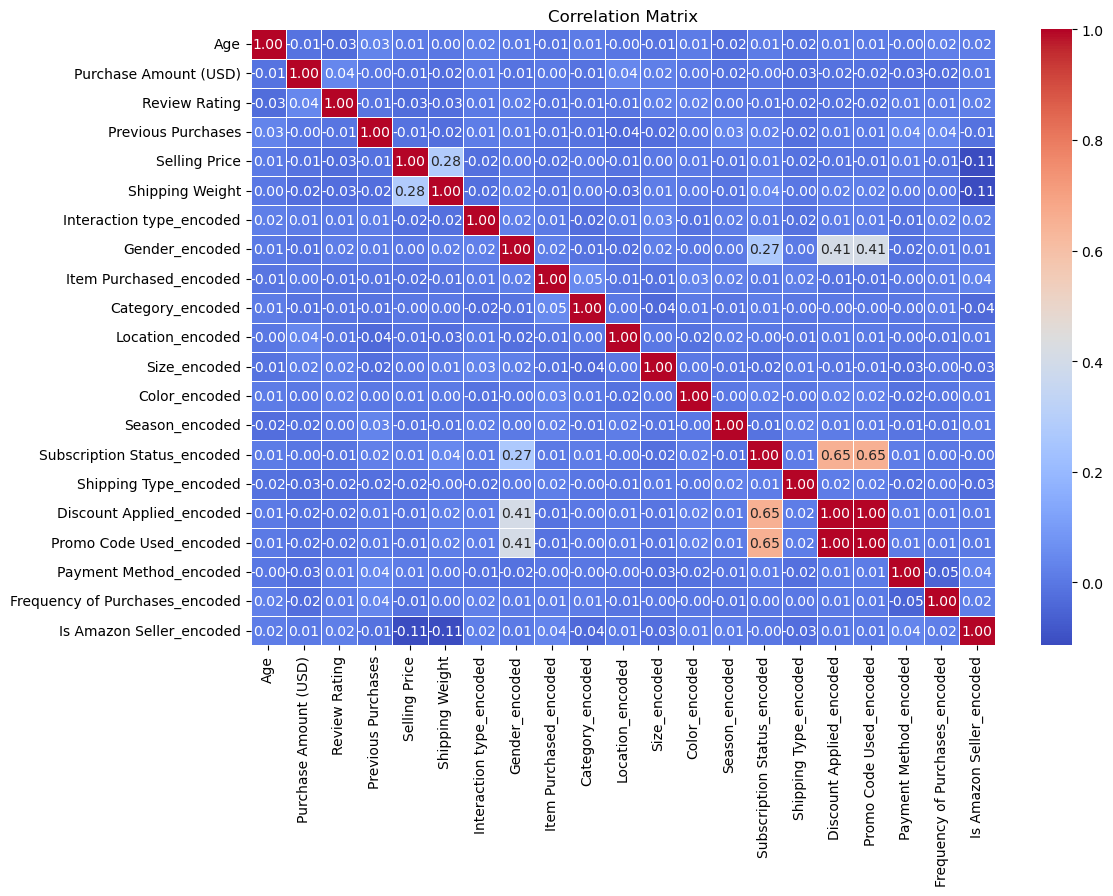

In [38]:
correlation_columns = [
    'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 
    'Selling Price', 'Shipping Weight', 
    'Interaction type_encoded', 'Gender_encoded', 'Item Purchased_encoded', 
    'Category_encoded', 'Location_encoded', 'Size_encoded', 'Color_encoded', 
    'Season_encoded', 'Subscription Status_encoded', 'Shipping Type_encoded', 
    'Discount Applied_encoded', 'Promo Code Used_encoded', 'Payment Method_encoded', 
    'Frequency of Purchases_encoded', 'Is Amazon Seller_encoded'
]

correlation_matrix = data[correlation_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Distribution Analysis

In [39]:
bar_df = data.copy()

bar_df.columns

Index(['product id', 'Interaction type', 'Time stamp', 'Customer ID', 'Age',
       'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases', 'Product Name', 'Selling Price',
       'Shipping Weight', 'Is Amazon Seller', 'Interaction type_encoded',
       'Gender_encoded', 'Item Purchased_encoded', 'Category_encoded',
       'Location_encoded', 'Size_encoded', 'Color_encoded', 'Season_encoded',
       'Subscription Status_encoded', 'Shipping Type_encoded',
       'Discount Applied_encoded', 'Promo Code Used_encoded',
       'Payment Method_encoded', 'Frequency of Purchases_encoded',
       'Is Amazon Seller_encoded'],
      dtype='object')

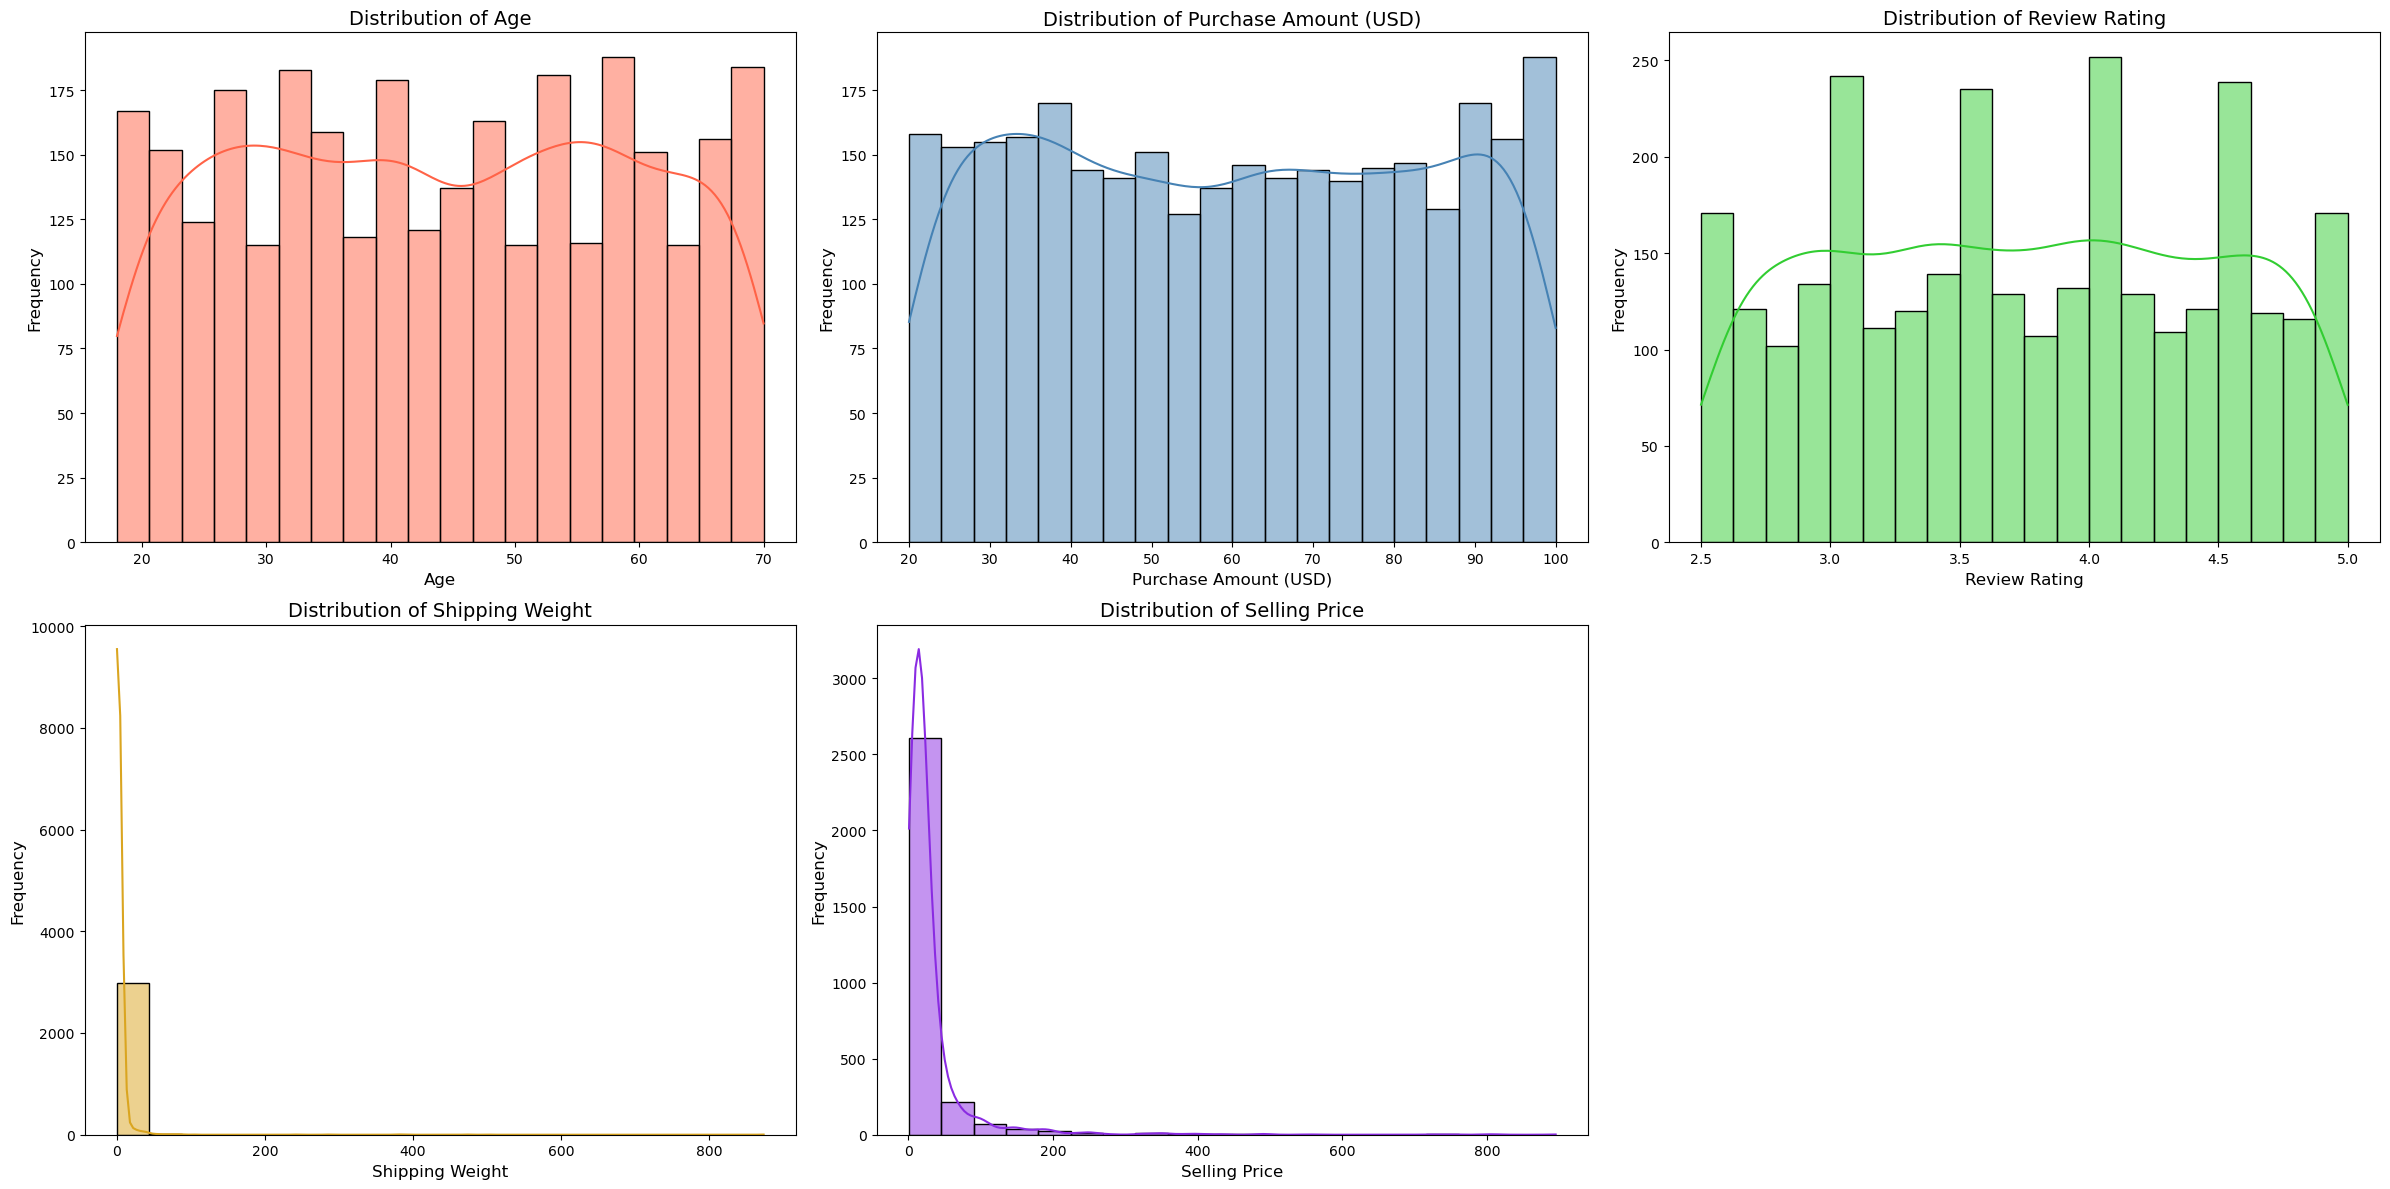

In [40]:
columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 
           'Shipping Weight', 'Selling Price']

plt.figure(figsize=(24,12))

colors = ['#FF6347', '#4682B4', '#32CD32', '#DAA520', '#8A2BE2', '#FF1493'] 

for i, (column, color) in enumerate(zip(columns, colors), 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=20, color=color)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

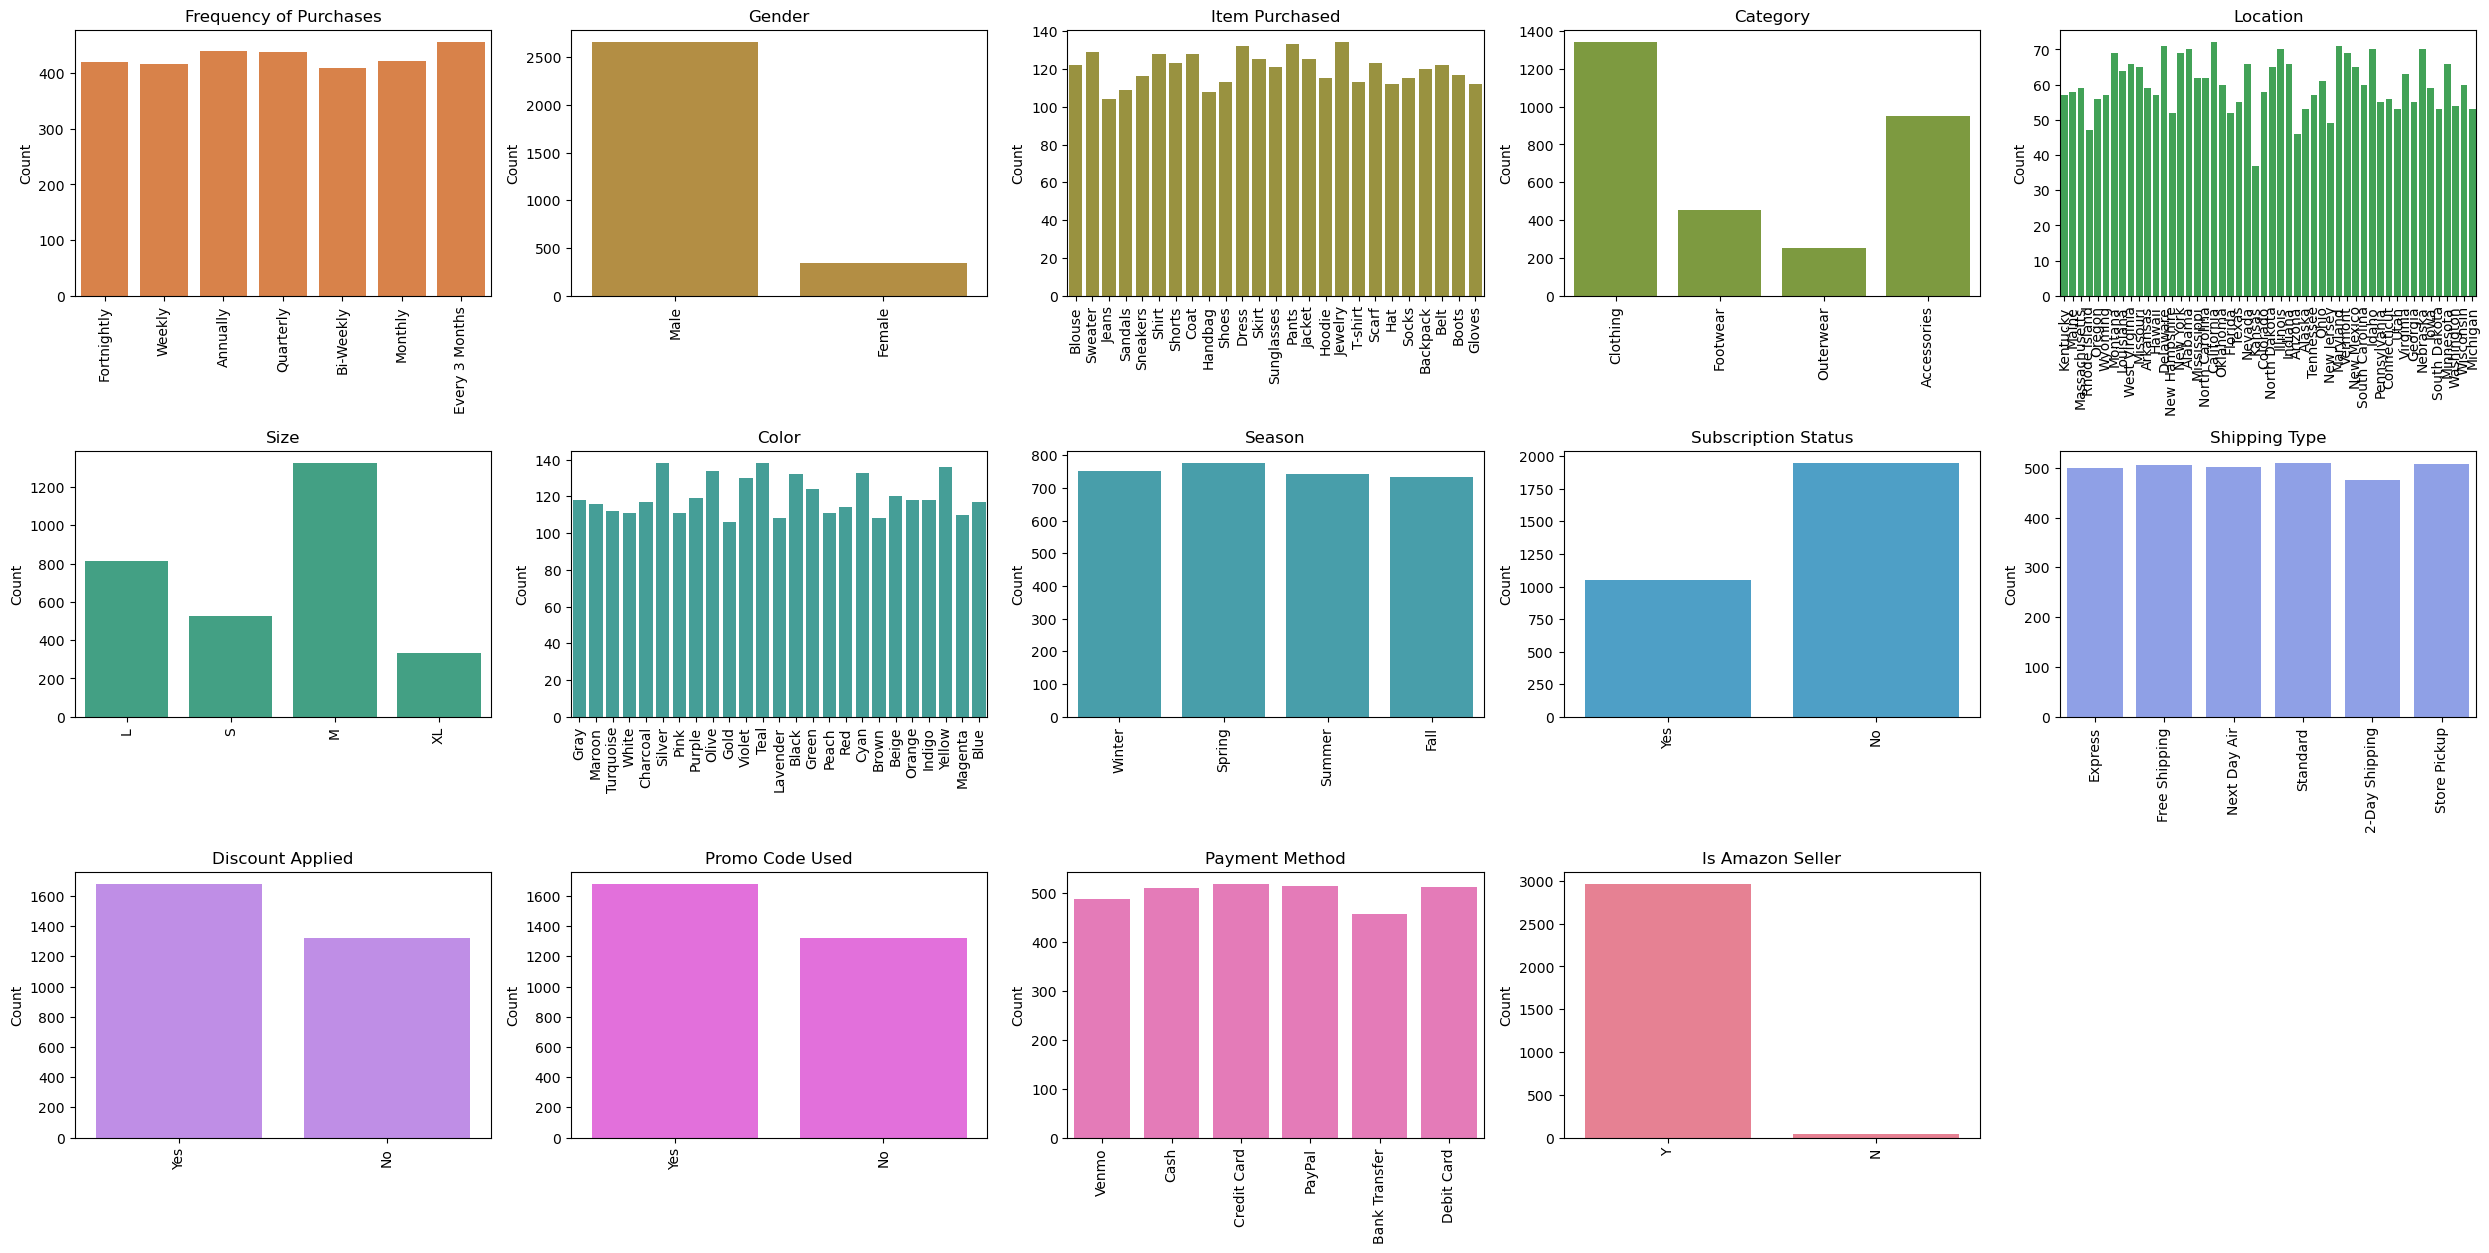

In [41]:
columns = ['Frequency of Purchases', 'Gender', 'Item Purchased', 
           'Category', 'Location', 'Size', 'Color', 
           'Season', 'Subscription Status', 'Shipping Type', 
           'Discount Applied', 'Promo Code Used', 'Payment Method', 
           'Is Amazon Seller']

colors = sns.color_palette("husl", len(columns))

plt.figure(figsize=(25, 20))

for i, column in enumerate(columns, 1):
    plt.subplot(5, 5, i)
    ax = sns.countplot(x=data[column], color=colors[i % len(colors)])
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Outlier Detection

In [42]:
outlier_df = data.copy()

In [43]:
outlier_df.columns

Index(['product id', 'Interaction type', 'Time stamp', 'Customer ID', 'Age',
       'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases', 'Product Name', 'Selling Price',
       'Shipping Weight', 'Is Amazon Seller', 'Interaction type_encoded',
       'Gender_encoded', 'Item Purchased_encoded', 'Category_encoded',
       'Location_encoded', 'Size_encoded', 'Color_encoded', 'Season_encoded',
       'Subscription Status_encoded', 'Shipping Type_encoded',
       'Discount Applied_encoded', 'Promo Code Used_encoded',
       'Payment Method_encoded', 'Frequency of Purchases_encoded',
       'Is Amazon Seller_encoded'],
      dtype='object')

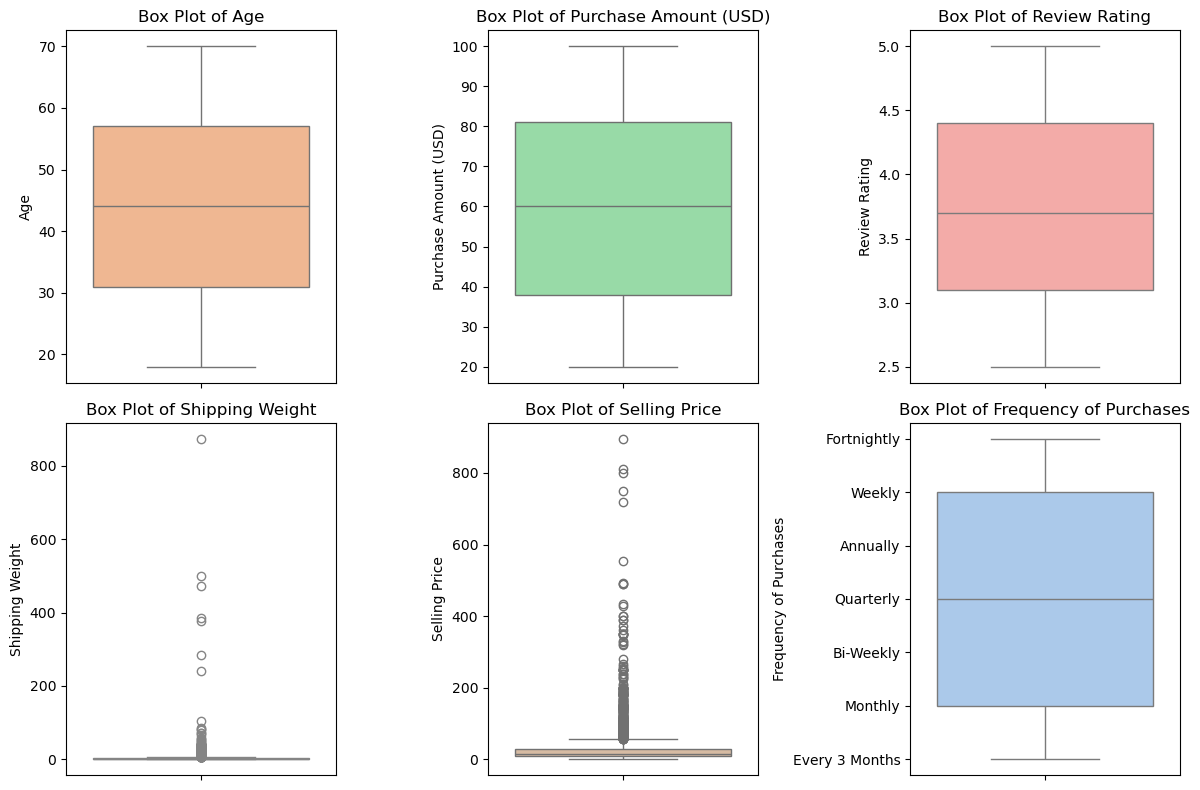

In [44]:
columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 
           'Shipping Weight', 'Selling Price', 'Frequency of Purchases']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column], color=sns.color_palette("pastel")[i % 6])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

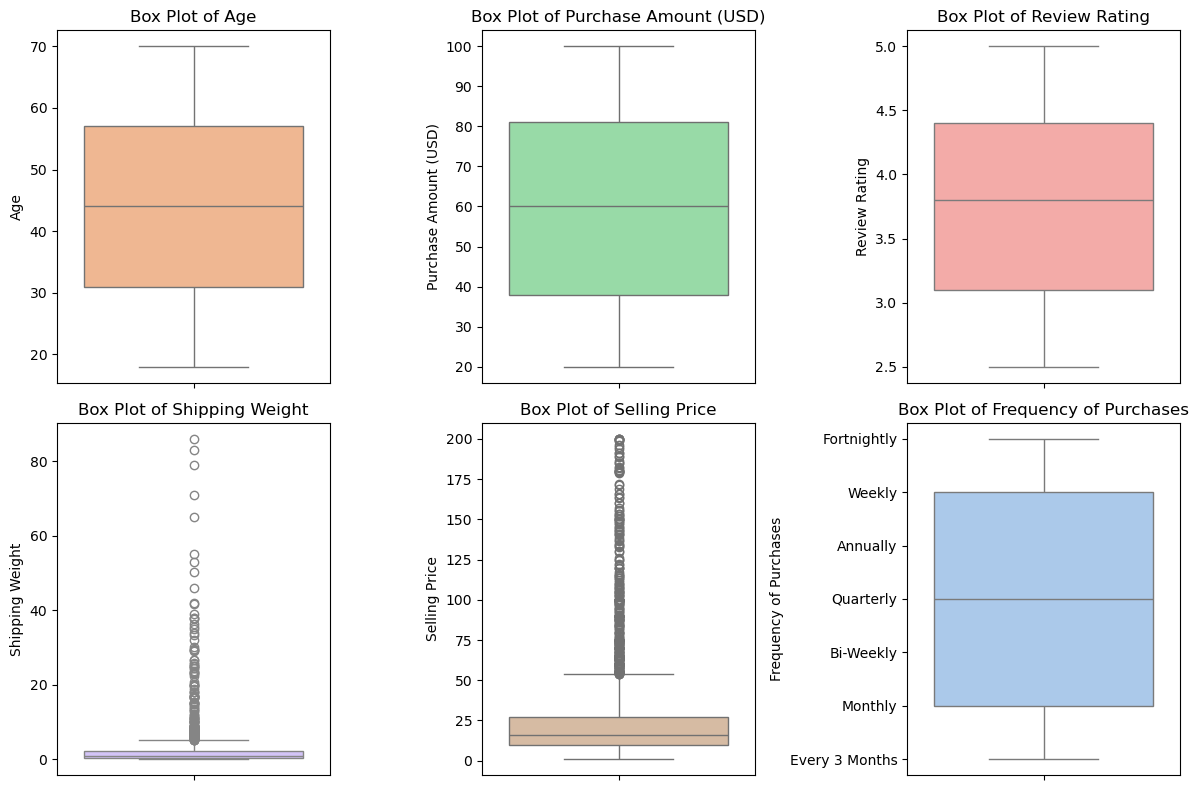

In [45]:
filtered_data = data[(data['Selling Price'] <= 200) & (data['Shipping Weight'] <= 200)]

columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 
           'Shipping Weight', 'Selling Price', 'Frequency of Purchases']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=filtered_data[column], color=sns.color_palette("pastel")[i % 6])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### Regression Analysis

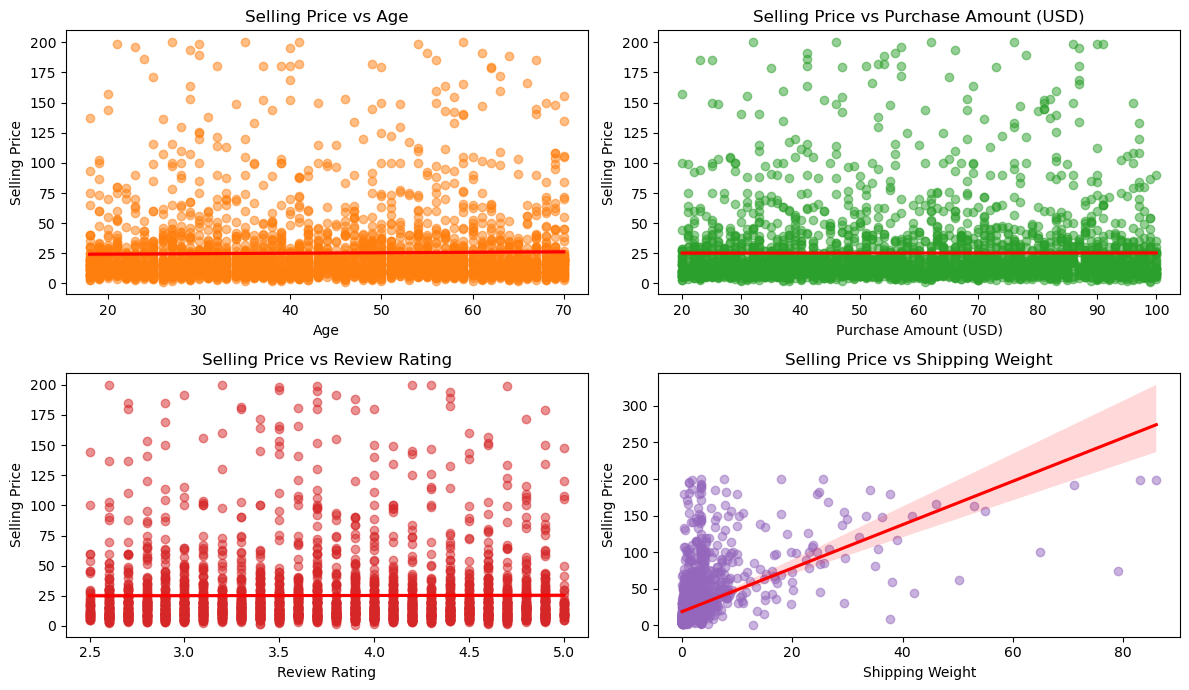

In [46]:
columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 
           'Shipping Weight']

plt.figure(figsize=(12,7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=filtered_data[column], y=filtered_data['Selling Price'], scatter_kws={'alpha': 0.5}, 
                line_kws={'color': 'red'}, color=sns.color_palette("tab10")[i])
    plt.title(f'Selling Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

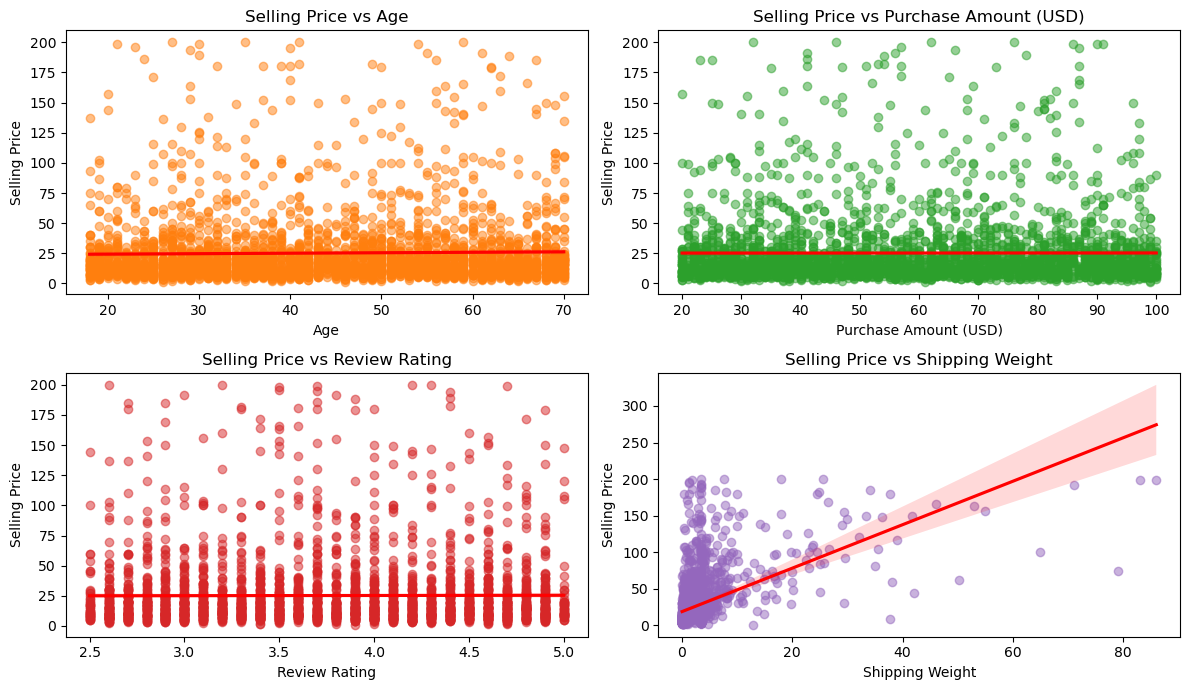

In [47]:
columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 
           'Shipping Weight']

plt.figure(figsize=(12,7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=filtered_data[column], y=filtered_data['Selling Price'], scatter_kws={'alpha': 0.5}, 
                line_kws={'color': 'red'}, color=sns.color_palette("tab10")[i])
    plt.title(f'Selling Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

## Phase 5: Data Analysis: Market Analytics

### Interaction Type Proportions

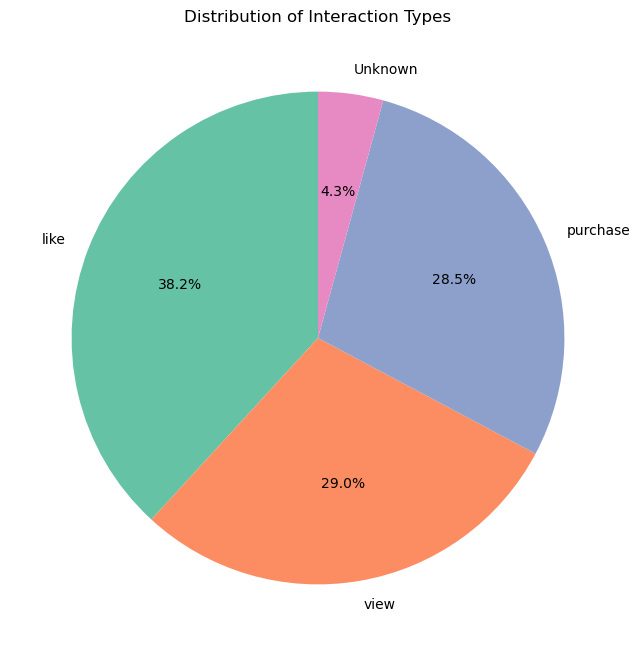

In [48]:
interaction_counts = data['Interaction type'].value_counts()

plt.figure(figsize=(8, 8))
interaction_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(interaction_counts)), startangle=90)
plt.title('Distribution of Interaction Types')
plt.ylabel('') 
plt.show()

### Sales Trend over Time

In [49]:
data.columns

Index(['product id', 'Interaction type', 'Time stamp', 'Customer ID', 'Age',
       'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases', 'Product Name', 'Selling Price',
       'Shipping Weight', 'Is Amazon Seller', 'Interaction type_encoded',
       'Gender_encoded', 'Item Purchased_encoded', 'Category_encoded',
       'Location_encoded', 'Size_encoded', 'Color_encoded', 'Season_encoded',
       'Subscription Status_encoded', 'Shipping Type_encoded',
       'Discount Applied_encoded', 'Promo Code Used_encoded',
       'Payment Method_encoded', 'Frequency of Purchases_encoded',
       'Is Amazon Seller_encoded'],
      dtype='object')

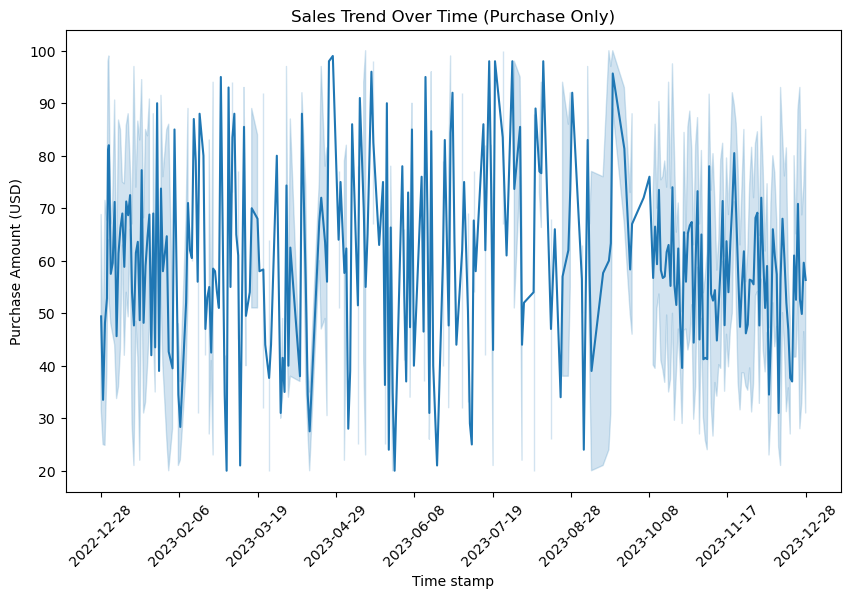

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

data["Time stamp"] = pd.to_datetime(data["Time stamp"], dayfirst=True)

data = data.sort_values(by="Time stamp")

purchase_data = data[data['Interaction type'] == 'purchase']

plt.figure(figsize=(10, 6))
sns.lineplot(x='Time stamp', y='Purchase Amount (USD)', data=purchase_data)

plt.title('Sales Trend Over Time (Purchase Only)')
plt.ylabel('Purchase Amount (USD)')

min_time = purchase_data['Time stamp'].min()
max_time = purchase_data['Time stamp'].max()

time_ticks = pd.date_range(start=min_time, end=max_time, periods=10)

plt.xticks(time_ticks, rotation=45)
plt.show()

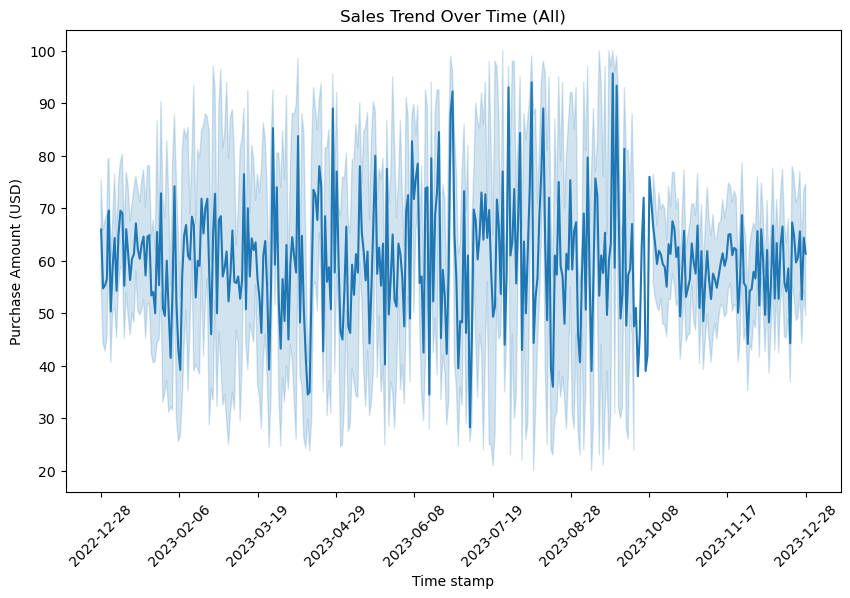

In [51]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time stamp', y='Purchase Amount (USD)', data=data)

plt.title('Sales Trend Over Time (All)')
plt.ylabel('Purchase Amount (USD)')

min_time = data['Time stamp'].min()
max_time = data['Time stamp'].max()

time_ticks = pd.date_range(start=min_time, end=max_time, periods=10)

plt.xticks(time_ticks, rotation=45)
plt.show()

### Revenue Dsitribution over Locations

In [52]:
state_abbreviations = {
    'Kentucky': 'KY', 'Montana': 'MT', 'Missouri': 'MO', 'Arkansas': 'AR', 'Alabama': 'AL', 
    'Rhode Island': 'RI', 'Louisiana': 'LA', 'Nevada': 'NV', 'Wyoming': 'WY', 'North Carolina': 'NC', 
    'Illinois': 'IL', 'Arizona': 'AZ', 'California': 'CA', 'New Jersey': 'NJ', 'Maryland': 'MD', 
    'New Mexico': 'NM', 'Idaho': 'ID', 'Hawaii': 'HI', 'Indiana': 'IN', 'New York': 'NY', 'Texas': 'TX', 
    'South Carolina': 'SC', 'Florida': 'FL', 'South Dakota': 'SD', 'West Virginia': 'WV', 'Minnesota': 'MN', 
    'Virginia': 'VA', 'Mississippi': 'MS', 'Maine': 'ME', 'Colorado': 'CO', 'Delaware': 'DE', 'New Hampshire': 'NH', 
    'Kansas': 'KS', 'Georgia': 'GA', 'Utah': 'UT', 'Vermont': 'VT', 'Tennessee': 'TN', 'Oregon': 'OR', 
    'Michigan': 'MI', 'Nebraska': 'NE', 'Connecticut': 'CT', 'North Dakota': 'ND', 'Iowa': 'IA', 'Washington': 'WA', 
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Wisconsin': 'WI', 'Alaska': 'AK', 'Massachusetts': 'MA', 'Pennsylvania': 'PA'
}

purchase_data['State Abbreviation'] = purchase_data['Location'].map(state_abbreviations)

location_revenue = purchase_data.groupby('State Abbreviation')['Purchase Amount (USD)'].sum().reset_index()

fig = px.choropleth(location_revenue, 
                    locations=location_revenue['State Abbreviation'],
                    locationmode='USA-states', 
                    color='Purchase Amount (USD)', 
                    hover_name='State Abbreviation', 
                    color_continuous_scale='Viridis',
                    title='Revenue Contribution by Location (Purchase Only)')

fig.update_geos(
    showcoastlines=True, coastlinecolor="Black", 
    showland=True, landcolor="lightgray", 
    scope='north america'
)

fig.update_layout(
    width=1000, 
    height=600  
)

fig.show()

/var/folders/vn/8zws5yln68766mf_fnhry1940000gn/T/ipykernel_82100/2160463748.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_data['State Abbreviation'] = purchase_data['Location'].map(state_abbreviations)


In [53]:
state_abbreviations = {
    'Kentucky': 'KY', 'Montana': 'MT', 'Missouri': 'MO', 'Arkansas': 'AR', 'Alabama': 'AL', 
    'Rhode Island': 'RI', 'Louisiana': 'LA', 'Nevada': 'NV', 'Wyoming': 'WY', 'North Carolina': 'NC', 
    'Illinois': 'IL', 'Arizona': 'AZ', 'California': 'CA', 'New Jersey': 'NJ', 'Maryland': 'MD', 
    'New Mexico': 'NM', 'Idaho': 'ID', 'Hawaii': 'HI', 'Indiana': 'IN', 'New York': 'NY', 'Texas': 'TX', 
    'South Carolina': 'SC', 'Florida': 'FL', 'South Dakota': 'SD', 'West Virginia': 'WV', 'Minnesota': 'MN', 
    'Virginia': 'VA', 'Mississippi': 'MS', 'Maine': 'ME', 'Colorado': 'CO', 'Delaware': 'DE', 'New Hampshire': 'NH', 
    'Kansas': 'KS', 'Georgia': 'GA', 'Utah': 'UT', 'Vermont': 'VT', 'Tennessee': 'TN', 'Oregon': 'OR', 
    'Michigan': 'MI', 'Nebraska': 'NE', 'Connecticut': 'CT', 'North Dakota': 'ND', 'Iowa': 'IA', 'Washington': 'WA', 
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Wisconsin': 'WI', 'Alaska': 'AK', 'Massachusetts': 'MA', 'Pennsylvania': 'PA'
}

data['State Abbreviation'] = data['Location'].map(state_abbreviations)

location_revenue = data.groupby('State Abbreviation')['Purchase Amount (USD)'].sum().reset_index()

fig = px.choropleth(location_revenue, 
                    locations=location_revenue['State Abbreviation'],
                    locationmode='USA-states', 
                    color='Purchase Amount (USD)', 
                    hover_name='State Abbreviation', 
                    color_continuous_scale='Viridis',
                    title='Revenue Contribution by Location (All)')

fig.update_geos(
    showcoastlines=True, coastlinecolor="Black", 
    showland=True, landcolor="lightgray", 
    scope='north america'
)

fig.update_layout(
    width=1000, 
    height=600  
)

fig.show()

### Product categories with the highest revenue

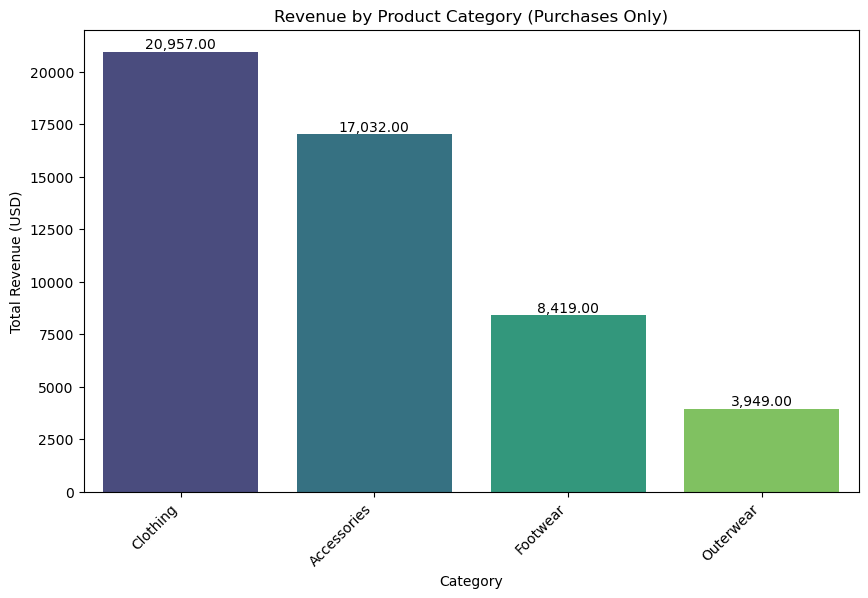

In [54]:
warnings.filterwarnings("ignore")

purchase_data = data[data['Interaction type'] == 'purchase']

category_revenue = purchase_data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Revenue by Product Category (Purchases Only)')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

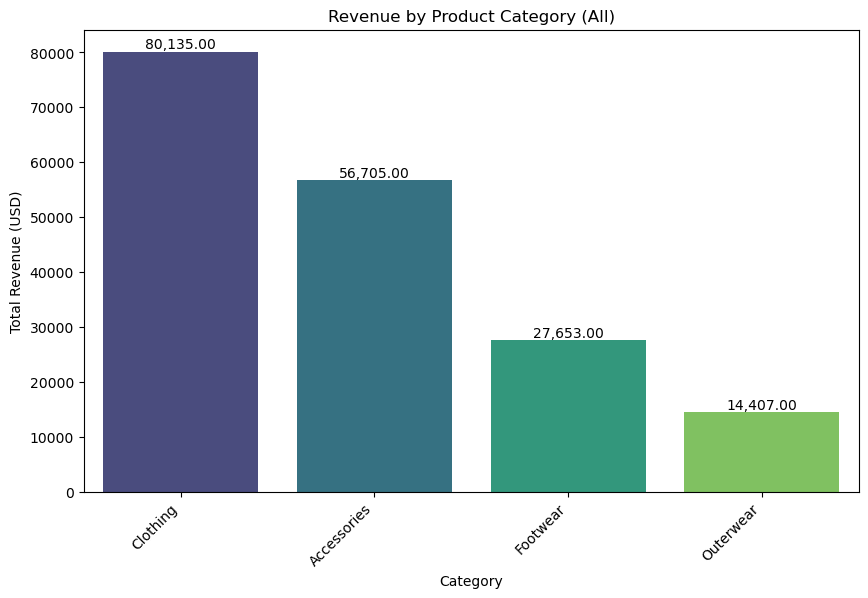

In [55]:
warnings.filterwarnings("ignore")

category_revenue = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Revenue by Product Category (All)')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Sales based on Age and Gender

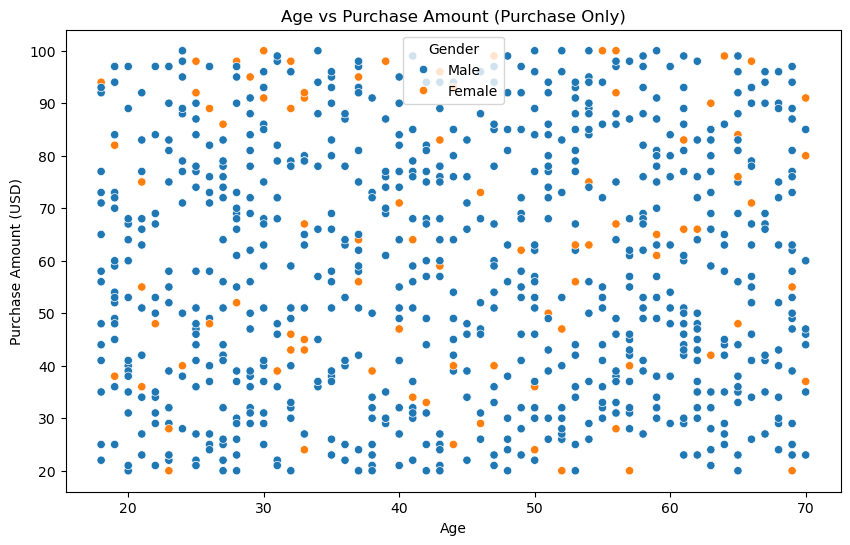

In [56]:
purchase_data = data[data['Interaction type'] == 'purchase']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=purchase_data, hue='Gender')
plt.title('Age vs Purchase Amount (Purchase Only)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

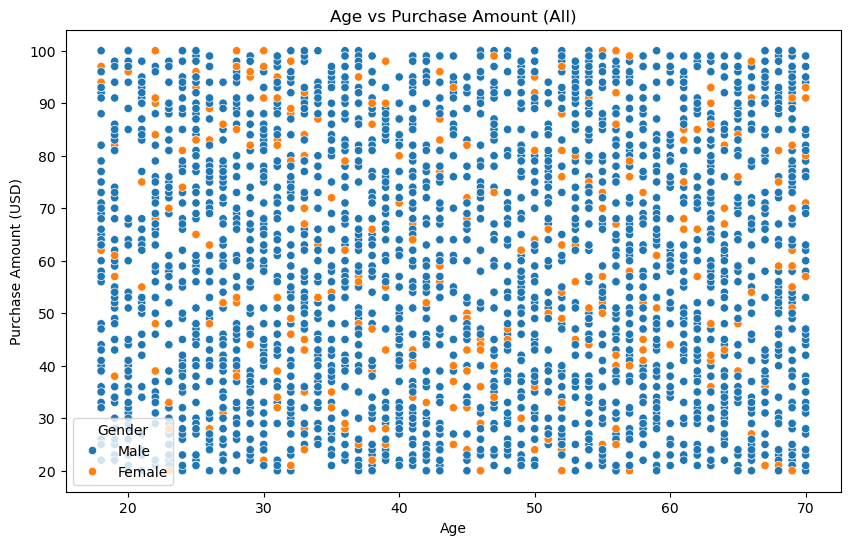

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=data, hue='Gender')
plt.title('Age vs Purchase Amount (All)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

### Customer purchase behavior over seasons

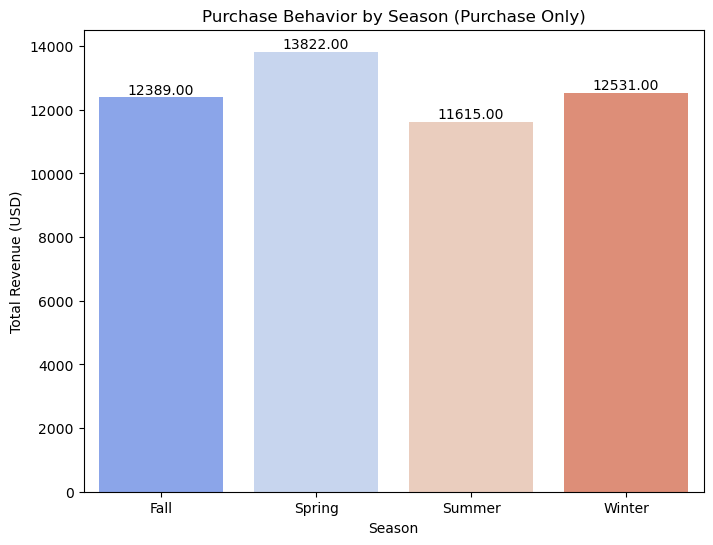

In [58]:
warnings.filterwarnings('ignore')

purchase_data = data[data['Interaction type'] == 'purchase']

season_revenue = purchase_data.groupby('Season')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=season_revenue.index, y=season_revenue.values, palette='coolwarm')
plt.title('Purchase Behavior by Season (Purchase Only)')
plt.xlabel('Season')
plt.ylabel('Total Revenue (USD)')

for i, v in enumerate(season_revenue.values):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', va='bottom')

plt.show()

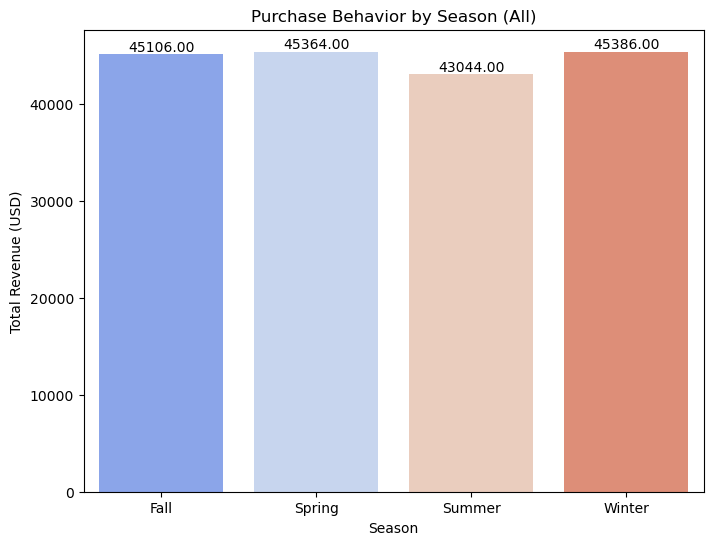

In [59]:
warnings.filterwarnings('ignore')

season_revenue = data.groupby('Season')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=season_revenue.index, y=season_revenue.values, palette='coolwarm')
plt.title('Purchase Behavior by Season (All)')
plt.xlabel('Season')
plt.ylabel('Total Revenue (USD)')

for i, v in enumerate(season_revenue.values):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', va='bottom')

plt.show()

### Purchase Amount Distribution

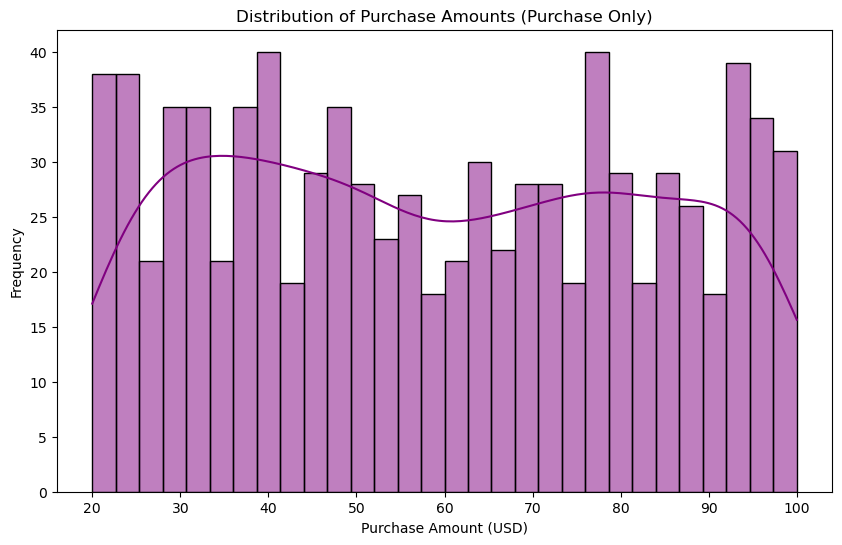

In [60]:
purchase_data = data[data['Interaction type'] == 'purchase']

plt.figure(figsize=(10, 6))
sns.histplot(purchase_data['Purchase Amount (USD)'], bins=30, kde=True, color='purple')
plt.title('Distribution of Purchase Amounts (Purchase Only)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

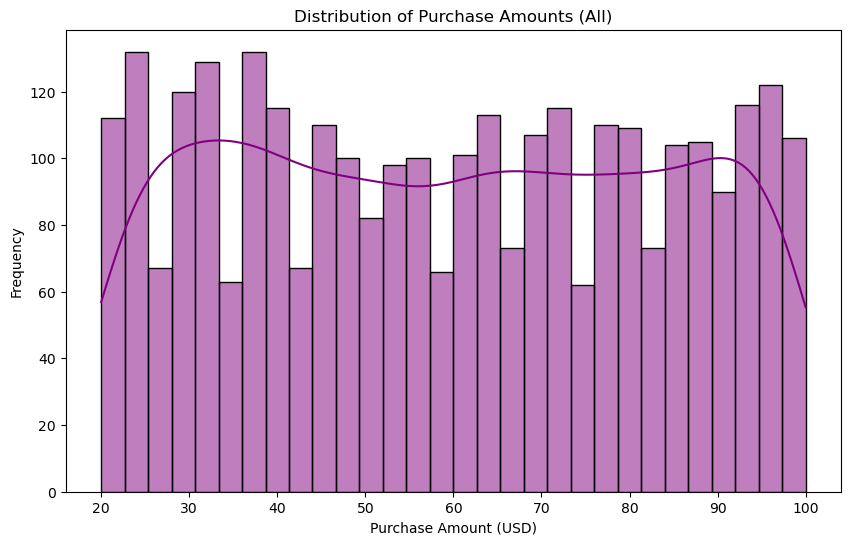

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase Amount (USD)'], bins=30, kde=True, color='purple')
plt.title('Distribution of Purchase Amounts (All)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

### Impact of discounts and promo codes on sales

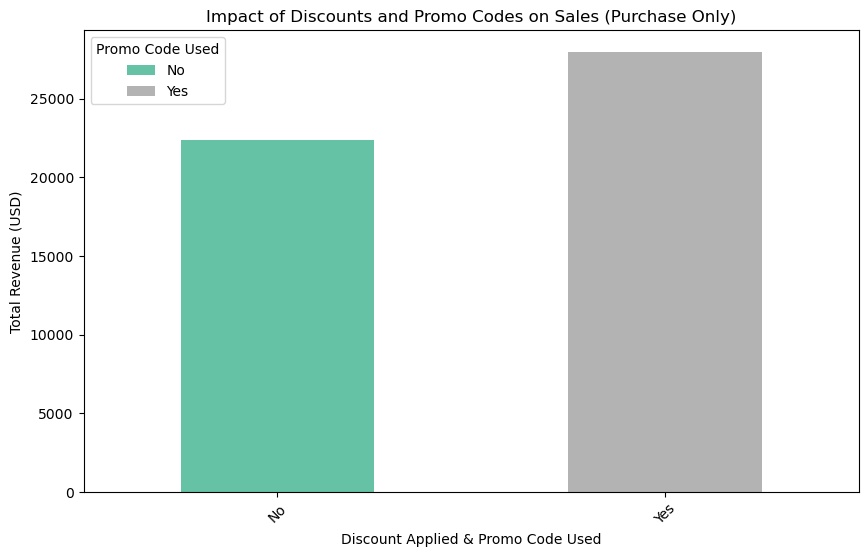

In [62]:
purchase_data = data[data['Interaction type'] == 'purchase']

discount_promo_revenue = purchase_data.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].sum().unstack()

discount_promo_revenue.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Impact of Discounts and Promo Codes on Sales (Purchase Only)')
plt.xlabel('Discount Applied & Promo Code Used')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

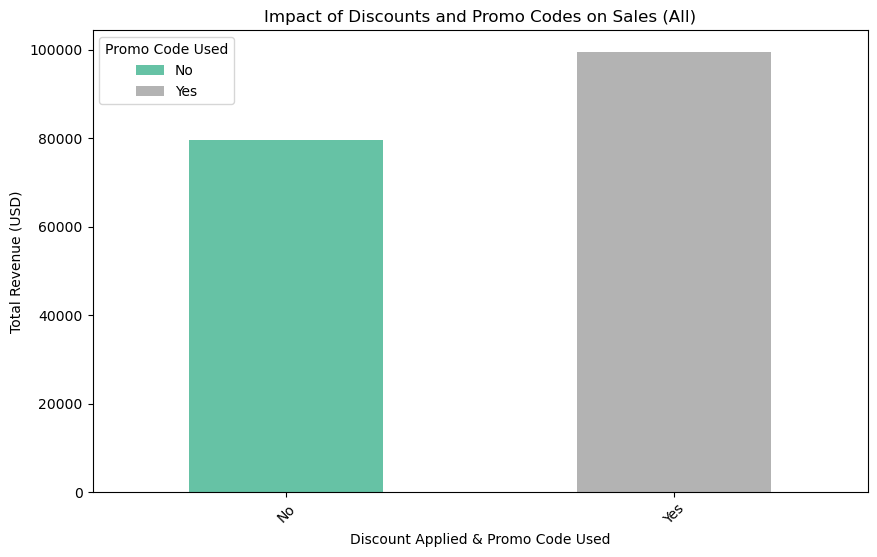

In [63]:
discount_promo_revenue = data.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].sum().unstack()

discount_promo_revenue.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Impact of Discounts and Promo Codes on Sales (All)')
plt.xlabel('Discount Applied & Promo Code Used')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

### Purchase Distribution by Category and Season

In [64]:
purchase_data = data[data['Interaction type'] == 'purchase']

fig = px.sunburst(purchase_data, 
                  path=['Category', 'Season'], 
                  values='Purchase Amount (USD)', 
                  title='Purchase Distribution by Category and Season')

fig.update_layout(
    height=500, 
    width=1050,  
    )


fig.show()

### Preferred Payment Methods

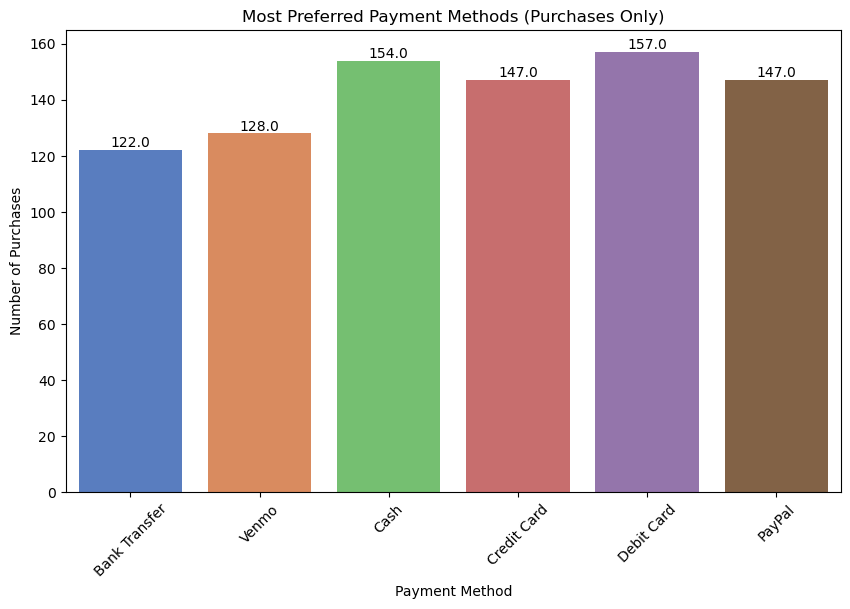

In [65]:
purchase_data = data[data['Interaction type'] == 'purchase']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Payment Method', data=purchase_data, palette='muted')
plt.title('Most Preferred Payment Methods (Purchases Only)')
plt.xlabel('Payment Method')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

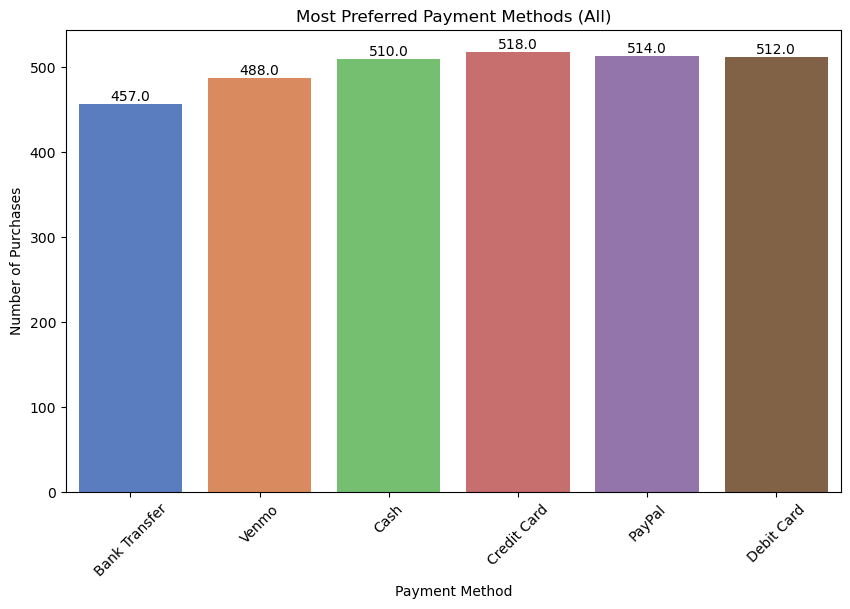

In [66]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Payment Method', data=data, palette='muted')
plt.title('Most Preferred Payment Methods (All)')
plt.xlabel('Payment Method')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### Preferred Category by Customer Age Distribution

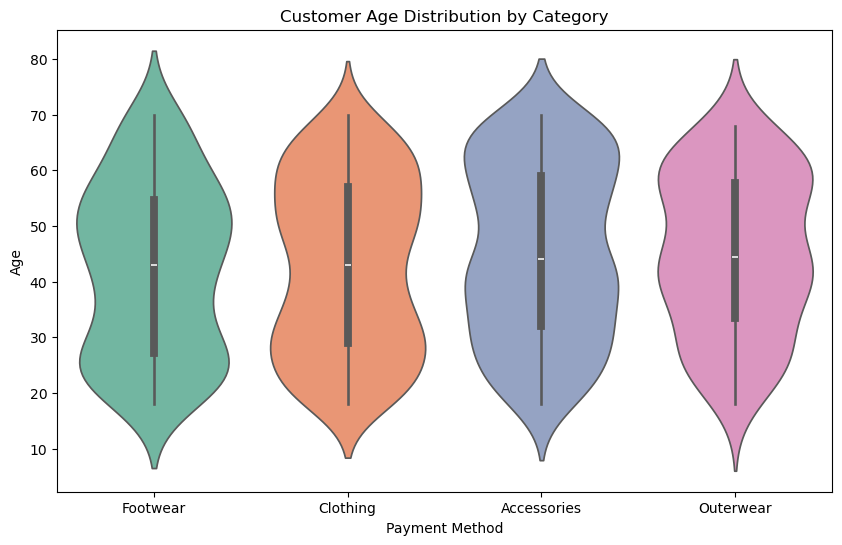

In [67]:
purchase_data = data[data['Interaction type'] == 'purchase']

plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Age', data=purchase_data, palette='Set2')
plt.title('Customer Age Distribution by Category')
plt.xlabel('Payment Method')
plt.ylabel('Age')
plt.show()

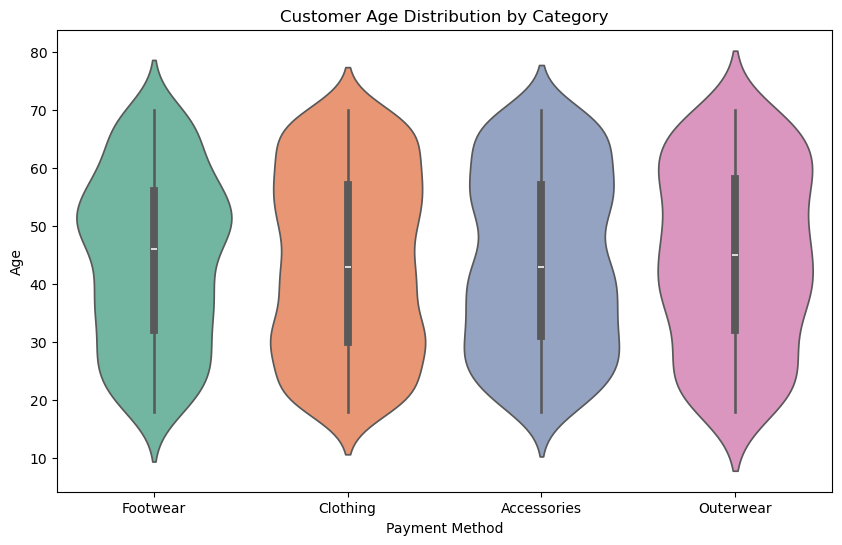

In [68]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Age', data=data, palette='Set2')
plt.title('Customer Age Distribution by Category')
plt.xlabel('Payment Method')
plt.ylabel('Age')
plt.show()

### Relation between Amount Spend and Review Rating

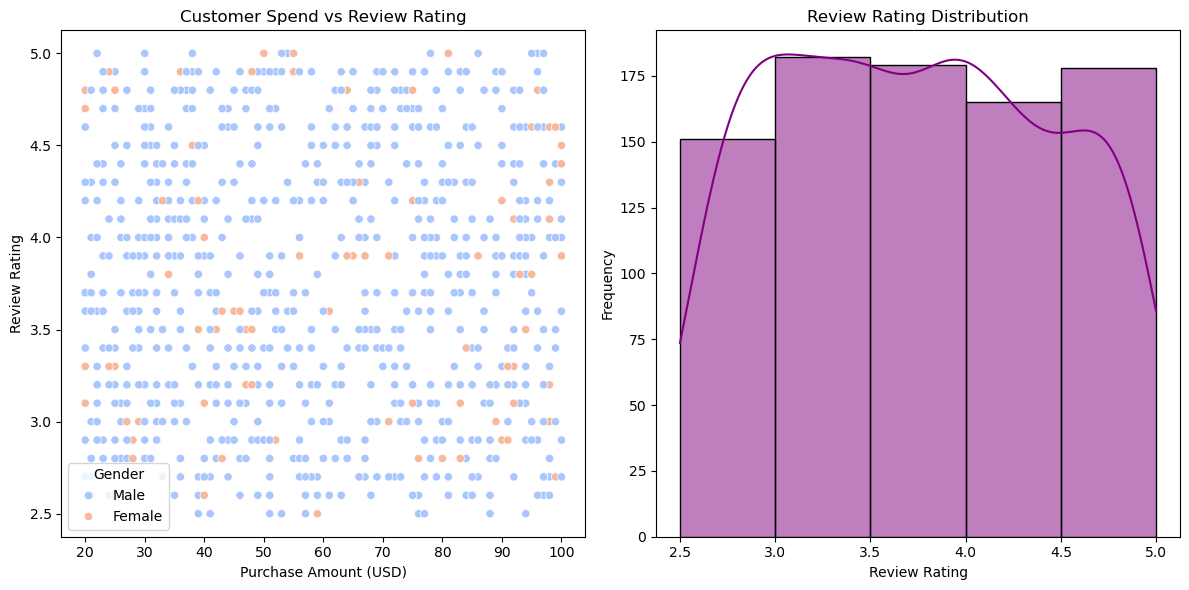

In [69]:
purchase_data = data[data['Interaction type'] == 'purchase']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Purchase Amount (USD)', y='Review Rating', data=purchase_data, hue='Gender', palette='coolwarm')
plt.title('Customer Spend vs Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')

plt.subplot(1, 2, 2)
sns.histplot(purchase_data['Review Rating'], bins=5, kde=True, color='purple')
plt.title('Review Rating Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Phase 6: Data Mining

### Market Analysis Stats

In [70]:
purchase_data = data[data['Interaction type'] == 'purchase']

overall_stats = {
    "Business Question": [
        "1. What is the total revenue?", 
        "2. What is the average purchase value?", 
        "3. Which item is the most purchased?", 
        "4. What is the most common location?", 
        "5. What is the average customer age?", 
        "6. What is the gender proportion of male customers?", 
        "7. What is the gender proportion of female customers?", 
        "8. What is the average review rating?", 
        "9. What is the most preferred payment method?", 
        "10. What proportion of purchases had a discount applied?", 
        "11. What proportion of purchases used a promo code?", 
        "12. What proportion of customers are subscribed?", 
        "13. What is the most common shipping type?", 
        "14. What is the average selling price?", 
        "15. Which item is the most common item purchased?", 
        "16. What is the average frequency of purchases?", 
        "17. What is the most common shipping weight?", 
        "18. What proportion of sellers are Amazon sellers?"
    ],
    "Values": [
        purchase_data['Purchase Amount (USD)'].sum(),
        purchase_data['Purchase Amount (USD)'].mean(),
        purchase_data['Item Purchased'].mode()[0],
        purchase_data['Location'].mode()[0],
        purchase_data['Age'].mean(),
        purchase_data[purchase_data['Gender'] == 'Male'].shape[0] / purchase_data.shape[0],
        purchase_data[purchase_data['Gender'] == 'Female'].shape[0] / purchase_data.shape[0],
        purchase_data['Review Rating'].mean(),
        purchase_data['Payment Method'].mode()[0],
        purchase_data['Discount Applied'].map({'Yes': 1, 'No': 0}).mean(),
        purchase_data['Promo Code Used'].map({'Yes': 1, 'No': 0}).mean(),
        purchase_data['Subscription Status'].map({'Yes': 1, 'No': 0}).mean(),
        purchase_data['Shipping Type'].mode()[0],
        purchase_data['Selling Price'].mean(),
        purchase_data['Item Purchased'].mode()[0],
        purchase_data['Frequency of Purchases'].mode()[0],
        purchase_data['Shipping Weight'].mean(),
        purchase_data['Is Amazon Seller'].map({'Y': 1, 'N': 0}).mean()
    ]
}

overall_stats_df = pd.DataFrame(overall_stats)

print("                  Purchased Data Statistics")
overall_stats_df

                  Purchased Data Statistics


Business Question          Values
0                       1. What is the total revenue?           50357
1              2. What is the average purchase value?       58.897076
2                3. Which item is the most purchased?      Sunglasses
3                4. What is the most common location?         Alabama
4                5. What is the average customer age?       43.756725
5   6. What is the gender proportion of male custo...        0.887719
6   7. What is the gender proportion of female cus...        0.112281
7               8. What is the average review rating?        3.740351
8       9. What is the most preferred payment method?      Debit Card
9   10. What proportion of purchases had a discoun...        0.562573
10  11. What proportion of purchases used a promo ...        0.562573
11   12. What proportion of customers are subscribed?        0.352047
12         13. What is the most common shipping type?        Standard
13             14. What is the average selling price?       29.350143
14  15. Which item is the most common item purchased?      Sunglasses
15    16. What is the average frequency of purchases?  Every 3 Months
16       17. What is the most common shipping weight?        2.752692
17  18. What proportion of sellers are Amazon sell...        0.985965

In [71]:
overall_stats = {
    "Business Question": [
        "1. What is the total revenue?", 
        "2. What is the average purchase value?", 
        "3. Which item is the most purchased?", 
        "4. What is the most common location?", 
        "5. What is the average customer age?", 
        "6. What is the gender proportion of male customers?", 
        "7. What is the gender proportion of female customers?", 
        "8. What is the average review rating?", 
        "9. What is the most preferred payment method?", 
        "10. What proportion of purchases had a discount applied?", 
        "11. What proportion of purchases used a promo code?", 
        "12. What proportion of customers are subscribed?", 
        "13. What is the most common shipping type?", 
        "14. What is the average selling price?", 
        "15. Which item is the most common item purchased?", 
        "16. What is the average frequency of purchases?", 
        "17. What is the most common shipping weight?", 
        "18. What proportion of sellers are Amazon sellers?"
    ],
    "Values": [
        data['Purchase Amount (USD)'].sum(),
        data['Purchase Amount (USD)'].mean(),
        data['Item Purchased'].mode()[0],
        data['Location'].mode()[0],
        data['Age'].mean(),
        data[data['Gender'] == 'Male'].shape[0] / data.shape[0],
        data[data['Gender'] == 'Female'].shape[0] / data.shape[0],
        data['Review Rating'].mean(),
        data['Payment Method'].mode()[0],
        data['Discount Applied'].map({'Yes': 1, 'No': 0}).mean(),
        data['Promo Code Used'].map({'Yes': 1, 'No': 0}).mean(),
        data['Subscription Status'].map({'Yes': 1, 'No': 0}).mean(),
        data['Shipping Type'].mode()[0],
        data['Selling Price'].mean(),
        data['Item Purchased'].mode()[0],
        data['Frequency of Purchases'].mode()[0],
        data['Shipping Weight'].mean(),
        data['Is Amazon Seller'].map({'Y': 1, 'N': 0}).mean()
    ]
}

overall_stats_df = pd.DataFrame(overall_stats)

print("                  Complete Data Statistics")
overall_stats_df

                  Complete Data Statistics


Business Question          Values
0                       1. What is the total revenue?          178900
1              2. What is the average purchase value?       59.653218
2                3. Which item is the most purchased?         Jewelry
3                4. What is the most common location?      California
4                5. What is the average customer age?       44.064021
5   6. What is the gender proportion of male custo...        0.884295
6   7. What is the gender proportion of female cus...        0.115705
7               8. What is the average review rating?        3.749783
8       9. What is the most preferred payment method?     Credit Card
9   10. What proportion of purchases had a discoun...        0.559186
10  11. What proportion of purchases used a promo ...        0.559186
11   12. What proportion of customers are subscribed?        0.351117
12         13. What is the most common shipping type?        Standard
13             14. What is the average selling price?       30.372828
14  15. Which item is the most common item purchased?         Jewelry
15    16. What is the average frequency of purchases?  Every 3 Months
16       17. What is the most common shipping weight?        3.352031
17  18. What proportion of sellers are Amazon sell...        0.987329

### Customer Segmentation

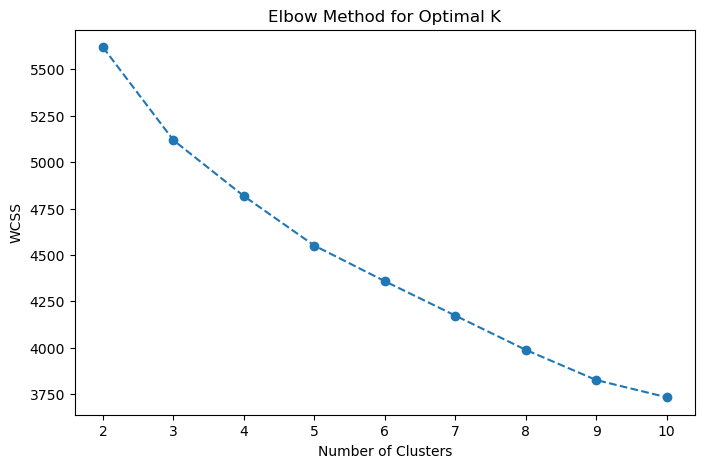

In [72]:
clustering_data = data.copy()

features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases_encoded', 
            'Subscription Status_encoded', 'Discount Applied_encoded', 'Promo Code Used_encoded',
            'Shipping Type_encoded', 'Payment Method_encoded']

clustering_data = clustering_data[clustering_data['Interaction type'] == 'purchase'][features].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Silhouette Score: 0.1946392570288857


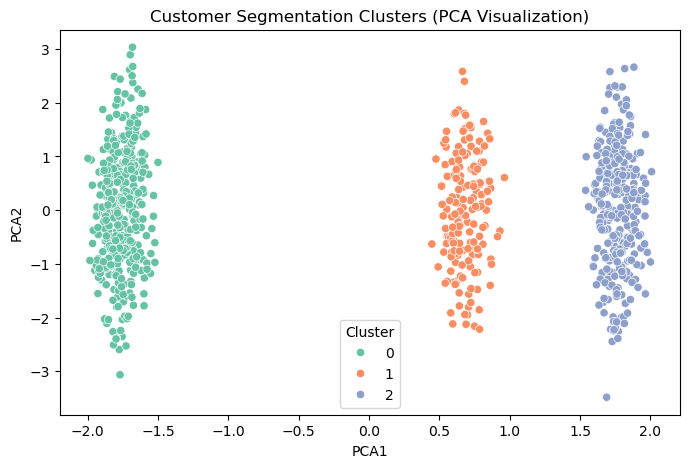

In [73]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

sil_score = silhouette_score(scaled_data, clustering_data['Cluster'])
print(f"Silhouette Score: {sil_score}")

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
clustering_data['PCA1'] = pca_data[:, 0]
clustering_data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue=clustering_data['Cluster'], palette='Set2', data=clustering_data)
plt.title("Customer Segmentation Clusters (PCA Visualization)")
plt.show()

In [74]:
cluster_summary = clustering_data.groupby('Cluster').mean()

cluster_summary['Count'] = clustering_data['Cluster'].value_counts()

cluster_summary

Age  Purchase Amount (USD)  Previous Purchases  \
Cluster                                                         
0        43.692513              59.890374           25.457219   
1        44.588889              59.177778           25.033333   
2        43.338870              57.495017           27.926910   

         Frequency of Purchases_encoded  Subscription Status_encoded  \
Cluster                                                                
0                              3.021390                          0.0   
1                              2.933333                          0.0   
2                              3.056478                          1.0   

         Discount Applied_encoded  Promo Code Used_encoded  \
Cluster                                                      
0                             0.0                      0.0   
1                             1.0                      1.0   
2                             1.0                      1.0   

         Shipping Type_encoded  Payment Method_encoded      PCA1      PCA2  \
Cluster                                                                      
0                     2.478610                2.574866 -1.755041  0.009360   
1                     2.511111                2.500000  0.682938 -0.033118   
2                     2.631229                2.438538  1.772280  0.008175   

         Count  
Cluster         
0          374  
1          180  
2          301

Cluster 0 (Standard Buyers, No Discounts) → These customers don’t engage with promotions. Consider loyalty perks or bundling offers.

Cluster 1 (Price-Sensitive Customers) → Continue offering discounts & promo codes, but experiment with subscription incentives to retain them.

Cluster 2 (Loyal & Engaged Buyers) → Best customers! Prioritize exclusive deals, early access to new products, and VIP membership to increase retention.

### Recommendation System

In [75]:
recommend_data = data[['Customer ID', 'Item Purchased', 'Purchase Amount (USD)', 'Review Rating']]

customer_item_matrix = recommend_data.pivot_table(index='Customer ID', columns='Item Purchased', 
                                                   values='Purchase Amount (USD)', fill_value=0)

sparse_matrix = csr_matrix(customer_item_matrix.values)

user_similarity = cosine_similarity(sparse_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=customer_item_matrix.index, columns=customer_item_matrix.index)

item_similarity = cosine_similarity(customer_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=customer_item_matrix.columns, columns=customer_item_matrix.columns)

def hybrid_recommend(customer_id, num_recommendations=5):
    if customer_id not in customer_item_matrix.index:
        return "Customer ID not found in dataset."

    purchased_items = customer_item_matrix.loc[customer_id]
    purchased_items = purchased_items[purchased_items > 0].index.tolist()

    similar_users = user_similarity_df[customer_id].sort_values(ascending=False)[1:6]
    user_based_items = customer_item_matrix.loc[similar_users.index].mean().sort_values(ascending=False)

    item_based_items = []
    for item in purchased_items:
        similar_items = item_similarity_df[item].sort_values(ascending=False)[1:6].index.tolist()
        item_based_items.extend(similar_items)

    combined_recommendations = pd.Series(user_based_items.index.tolist() + item_based_items)
    combined_recommendations = combined_recommendations.value_counts().index.tolist()

    final_recommendations = [item for item in combined_recommendations if item not in purchased_items]

    return final_recommendations[:num_recommendations]

customer_id = 669 
recommended_products = hybrid_recommend(customer_id)
print("Recommended Products:", recommended_products)

Recommended Products: ['Sweater', 'Sunglasses', 'Socks', 'Sneakers', 'Pants']


## Phase 7: Presentation

**Conclusion**: Based on the market analysis, customer segmentation, and recommendation system developed in this project, valuable insights into customer preferences and behavior have been uncovered. These findings enable a more targeted sales strategy and personalized customer interactions, ultimately driving sales performance improvements and enhancing customer satisfaction. By leveraging these analyses, businesses can effectively tailor their offerings to meet customer needs and identify growth opportunities.